<a href="https://colab.research.google.com/github/AshaBaby-dev/CorrelationanalysisGHG/blob/main/Linking_Mortality_NO2_(1)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set up the Seaborn style
sns.set(style="whitegrid")


# Load Data

In [ ]:
# Load the mortality data
mortality_data = pd.read_excel("mortalitytablesfinal.xlsx", sheet_name="2", skiprows=4)

# Cleaning #1 Mortality Data
# Set the correct headers for the mortality data
mortality_data.columns = mortality_data.iloc[0]  # Set the first row as the header
mortality_data = mortality_data.drop(mortality_data.index[0])  # Drop the duplicate header row
mortality_data = mortality_data.reset_index(drop=True)
mortality_data.columns.name = None

# Load Lookup datasets
local_authority_lookup = pd.read_csv("Local_Authority_District_to_Region_(December_2022)_Lookup_in_England.csv")


In [ ]:
# Load Traffic Data
traffic_data = pd.read_csv("region_traffic_by_vehicle_type.csv")

In [ ]:
# Load GHG Data
# Load the specific sheets from the first Excel file
file_path_ghg = '2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx'

sheets_to_load = ['1_2', '1_3', '1_4']
ghg_data = pd.read_excel(file_path_ghg, sheet_name=sheets_to_load)

In [ ]:
# Clean and process the data from the sheets 1_2, 1_3, and 1_4
df_1_2 = ghg_data['1_2']
df_1_3 = ghg_data['1_3']
df_1_4 = ghg_data['1_4']

# Extracting useful columns and renaming for better understanding
df_1_2 = df_1_2.rename(columns=df_1_2.iloc[3]).drop([0, 1, 2, 3]).reset_index(drop=True)
df_1_3 = df_1_3.rename(columns=df_1_3.iloc[3]).drop([0, 1, 2, 3]).reset_index(drop=True)
df_1_4 = df_1_4.rename(columns=df_1_4.iloc[3]).drop([0, 1, 2, 3]).reset_index(drop=True)

# Data Cleaning and Summary

## Mortality Data Cleaning

In [ ]:
# Mortality Data Cleaning
# Check for missing values
mortality_missing_values = mortality_data.isnull().sum()

# Check for duplicates
mortality_duplicates = mortality_data.duplicated().sum()

# Ensure correct data types
mortality_data_types = mortality_data.dtypes

In [ ]:
mortality_missing_values

,0
Year,0
Sex,0
Region name,0
Region code,0
Age,0
Cause,0
Deaths,0


In [ ]:
mortality_duplicates # No duplicates

0

In [ ]:
# Before cleaning/ transformation
mortality_data_types

,0
Year,object
Sex,object
Region name,object
Region code,object
Age,object
Cause,object
Deaths,object


In [ ]:
# Drop rows with missing values if any
mortality_data_cleaned = mortality_data.dropna()

# Remove duplicates if any
mortality_data_cleaned = mortality_data_cleaned.drop_duplicates()

# Convert relevant columns to numeric
mortality_data_cleaned['Deaths'] = pd.to_numeric(mortality_data_cleaned['Deaths'], errors='coerce')
mortality_data_cleaned['Year'] = pd.to_numeric(mortality_data_cleaned['Year'], errors='coerce')

In [ ]:
# After cleaning/ transformation - Verification
mortality_data_cleaned.dtypes

,0
Year,int64
Sex,object
Region name,object
Region code,object
Age,object
Cause,object
Deaths,int64


## Traffic Data Cleaning

In [ ]:
# Traffic Data Cleaning
# Check for missing values
traffic_missing_values = traffic_data.isnull().sum()

# Check for duplicates
traffic_duplicates = traffic_data.duplicated().sum()

# Ensure correct data types
traffic_data_types = traffic_data.dtypes

In [ ]:
traffic_missing_values

,0
year,0
region_id,0
Region_name,0
ons_code,0
total_link_length_km,0
total_link_length_miles,0
pedal_cycles,0
two_wheeled_motor_vehicles,0
cars_and_taxis,0
buses_and_coaches,0


In [ ]:
traffic_duplicates

0

In [ ]:
traffic_data_types # Before

,0
year,int64
region_id,int64
Region_name,object
ons_code,object
total_link_length_km,float64
total_link_length_miles,float64
pedal_cycles,float64
two_wheeled_motor_vehicles,float64
cars_and_taxis,int64
buses_and_coaches,float64


In [ ]:
# Drop rows with missing values if any
traffic_data_cleaned = traffic_data.dropna()

# Remove duplicates if any
traffic_data_cleaned = traffic_data_cleaned.drop_duplicates()

# Convert relevant columns to numeric
traffic_data_cleaned['year'] = pd.to_numeric(traffic_data_cleaned['year'], errors='coerce')
traffic_data_cleaned['all_motor_vehicles'] = pd.to_numeric(traffic_data_cleaned['all_motor_vehicles'], errors='coerce')

In [ ]:
traffic_data_cleaned.dtypes # Verification

,0
year,int64
region_id,int64
Region_name,object
ons_code,object
total_link_length_km,float64
total_link_length_miles,float64
pedal_cycles,float64
two_wheeled_motor_vehicles,float64
cars_and_taxis,int64
buses_and_coaches,float64


## GHG Emissions Data Cleaning

In [ ]:
# GHG Emissions Data Cleaning Function
def pre_clean_ghg_data(df):
    # Check for missing values
    missing_values = df.isnull().sum()

    # Check for duplicates
    duplicates = df.duplicated().sum()

    # Ensure correct data types
    data_types = df.dtypes

    return missing_values, duplicates, data_types

# pre cleaned values for each GHG data frame
co2_missing_values, co2_duplicates, co2_data_types = pre_clean_ghg_data(df_1_2)
ch4_missing_values, ch4_duplicates, ch4_data_types = pre_clean_ghg_data(df_1_3)
n2o_missing_values, n2o_duplicates, n2o_data_types = pre_clean_ghg_data(df_1_4)

In [ ]:
co2_missing_values, co2_duplicates, co2_data_types

(Region/Country                              0
 Second Tier Authority                       0
 Local Authority                             0
 Local Authority Code                      748
 Calendar Year                               0
 Industry Electricity                        0
 Industry Gas                                0
 Large Industrial Installations              0
 Industry 'Other'                            0
 Industry Total                              0
 Commercial Electricity                      0
 Commercial Gas                              0
 Commercial 'Other'                          0
 Commercial Total                            0
 Public Sector Electricity                   0
 Public Sector Gas                           0
 Public Sector 'Other'                       0
 Public Sector Total                         0
 Domestic Electricity                        0
 Domestic Gas                                0
 Domestic 'Other'                            0
 Domestic Tot

In [ ]:
# GHG Emissions Data Cleaning Function to check for missing values and duplicates
def pre_clean_ghg_data(df):
    # Check for missing values
    missing_values = df.isnull().sum()

    # Check for duplicates
    duplicates = df.duplicated().sum()

    # Ensure correct data types
    data_types = df.dtypes

    return missing_values, duplicates, data_types

# Pre-cleaned values for each GHG data frame
co2_missing_values, co2_duplicates, co2_data_types = pre_clean_ghg_data(df_1_2)
ch4_missing_values, ch4_duplicates, ch4_data_types = pre_clean_ghg_data(df_1_3)
n2o_missing_values, n2o_duplicates, n2o_data_types = pre_clean_ghg_data(df_1_4)

# Missing Values
missing_rows_co2 = df_1_2[df_1_2.isnull().any(axis=1)]
missing_rows_ch4 = df_1_3[df_1_3.isnull().any(axis=1)]
missing_rows_n2o = df_1_4[df_1_4.isnull().any(axis=1)]


In [ ]:
missing_rows_co2

,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
204,North East Total,North East Total,North East Total,NaN,2005,2212.343093,1477.865813,14692.127103,808.796145,19191.132154,...,42.72984,289.958999,0,4.297219,4.297219,34255.15849,2547.127,13.448548,8674.693,3.948861
205,North East Total,North East Total,North East Total,NaN,2006,2328.367048,1342.919096,14181.901905,771.378437,18624.566486,...,43.45655,289.754623,0,3.886512,3.886512,33522.274089,2552.568,13.132764,8674.693,3.864376
206,North East Total,North East Total,North East Total,NaN,2007,2219.915627,1225.092947,14202.668351,785.401501,18433.078425,...,41.539552,287.249014,0,3.178964,3.178964,32887.873176,2562.045,12.836571,8674.693,3.791243
207,North East Total,North East Total,North East Total,NaN,2008,2129.657189,1195.896028,13611.021283,639.835869,17576.410369,...,40.400392,315.784983,0,3.146682,3.146682,31692.79793,2569.312,12.33513,8674.693,3.653478
208,North East Total,North East Total,North East Total,NaN,2009,1740.036841,1016.862876,11388.748235,596.15406,14741.802013,...,38.531482,283.625626,0,3.087627,3.087627,27579.669335,2575.441,10.708717,8674.693,3.179325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,National Total,National Total,National Total,NaN,2017,17697.890037,15142.17064,32505.29526,17142.814067,82488.170004,...,1272.35834,8459.615672,0,310.546749,310.546749,357879.552505,66067.257699,5.416897,248717.5706,1.438899
7102,National Total,National Total,National Total,NaN,2018,20327.574822,18609.345366,31259.39699,16840.577986,87036.895164,...,1306.679719,9232.034706,0,304.353439,304.353439,351448.687105,66371.006647,5.295214,248717.5706,1.413043
7103,National Total,National Total,National Total,NaN,2019,17876.764713,17901.220794,30803.630558,16513.912742,83095.528808,...,1432.330087,8455.406449,0,301.271956,301.271956,337835.847039,66769.633181,5.059723,248717.5706,1.358311
7104,National Total,National Total,National Total,NaN,2020,14629.628337,16980.582477,28942.86985,16699.662241,77252.742904,...,1350.877375,8201.160238,0,305.185102,305.185102,301218.773315,67044.605507,4.492811,248717.5706,1.211088


In [ ]:
missing_rows_ch4

,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
204,North East Total,North East Total,North East Total,NaN,2005,70.073852,50.085418,347.923724,5.800217,473.883212,...,0,876.047235,1747.137033,88.011354,1835.148388,3764.012341,2547.127,1.477748,8674.693,0.433907
205,North East Total,North East Total,North East Total,NaN,2006,65.089199,45.693965,323.610168,5.145606,439.538938,...,0,838.484042,1621.979744,104.659988,1726.639732,3557.833863,2552.568,1.393825,8674.693,0.410139
206,North East Total,North East Total,North East Total,NaN,2007,59.23052,41.012098,290.12069,4.90101,395.264318,...,0,840.662771,1575.845536,109.826493,1685.67203,3450.990361,2562.045,1.346967,8674.693,0.397823
207,North East Total,North East Total,North East Total,NaN,2008,57.431522,37.221118,306.80388,4.010278,405.466798,...,0,816.607456,1171.495774,106.322205,1277.81798,3014.439276,2569.312,1.173248,8674.693,0.347498
208,North East Total,North East Total,North East Total,NaN,2009,52.417409,32.704351,275.825074,4.711347,365.658182,...,0,808.879281,1196.699393,104.312357,1301.01175,2978.02608,2575.441,1.156317,8674.693,0.3433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,National Total,National Total,National Total,NaN,2017,470.936557,448.904381,705.705461,178.016073,1803.562472,...,0,28670.077014,15821.005923,3286.747686,19107.753609,60247.031002,66067.257699,0.911905,248717.5706,0.242231
7102,National Total,National Total,National Total,NaN,2018,556.397648,539.839099,652.215102,193.506675,1941.958523,...,0,28155.721294,15911.984565,3267.279317,19179.263882,59771.22714,66371.006647,0.900562,248717.5706,0.240318
7103,National Total,National Total,National Total,NaN,2019,525.909498,519.657874,722.219795,181.251995,1949.039162,...,0,28183.865644,15684.547926,3189.165499,18873.713425,59381.236543,66769.633181,0.889345,248717.5706,0.23875
7104,National Total,National Total,National Total,NaN,2020,433.54782,470.639715,863.555489,190.962636,1958.70566,...,0,27810.510468,14304.397217,3061.739615,17366.136831,57067.736878,67044.605507,0.851191,248717.5706,0.229448


In [ ]:
missing_rows_n2o

,Region/Country,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,Industry Electricity,Industry Gas,Large Industrial Installations,Industry 'Other',Industry Total,...,Agriculture Soils,Agriculture Total,Landfill,Waste Management 'Other',Waste Management Total,Grand Total,"Population ('000s, mid-year estimate)",Per Capita Emissions (tCO2e),Area (km2),Emissions per km2 (kt CO2e)
204,North East Total,North East Total,North East Total,NaN,2005,8.849526,1.504475,1876.799015,29.913127,1917.066143,...,191.255937,342.891045,0,39.290112,39.290112,2421.277402,2547.127,0.950592,8674.693,0.27912
205,North East Total,North East Total,North East Total,NaN,2006,9.494734,1.313606,1523.177419,30.255144,1564.240903,...,182.311506,329.21943,0,39.565586,39.565586,2051.611691,2552.568,0.803744,8674.693,0.236505
206,North East Total,North East Total,North East Total,NaN,2007,8.611912,1.14445,1843.733422,30.503845,1883.993628,...,184.454664,332.966814,0,40.087194,40.087194,2370.910101,2562.045,0.925398,8674.693,0.273313
207,North East Total,North East Total,North East Total,NaN,2008,8.089822,1.125404,2140.578301,29.835913,2179.629441,...,187.198723,331.385911,0,39.303304,39.303304,2654.577541,2569.312,1.033186,8674.693,0.306014
208,North East Total,North East Total,North East Total,NaN,2009,6.519582,0.716631,1052.706806,27.56738,1087.510398,...,176.880715,316.195606,0,40.129614,40.129614,1541.107994,2575.441,0.598386,8674.693,0.177656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101,National Total,National Total,National Total,NaN,2017,87.358287,11.190137,408.941045,669.788333,1177.277802,...,8416.887302,14171.51107,0,1533.946188,1533.946188,19697.79958,66067.257699,0.298148,248717.5706,0.079197
7102,National Total,National Total,National Total,NaN,2018,113.263693,12.223315,398.199526,679.37481,1203.061345,...,8266.885876,13992.766612,0,1516.646016,1516.646016,19525.595038,66371.006647,0.294189,248717.5706,0.078505
7103,National Total,National Total,National Total,NaN,2019,109.904452,12.228224,425.550846,669.62366,1217.307182,...,8338.085305,14067.274743,0,1545.300778,1545.300778,19639.579741,66769.633181,0.294139,248717.5706,0.078963
7104,National Total,National Total,National Total,NaN,2020,100.824892,11.802786,329.285177,693.482414,1135.395269,...,7540.069438,13209.228909,0,1548.242114,1548.242114,18521.300303,67044.605507,0.276253,248717.5706,0.074467


In [ ]:
 # GHG Emissions Data Cleaning Function
def clean_ghg_data(df):
 # Drop rows with missing values if any
    df_cleaned = df.dropna()

    # Remove duplicates if any
    df_cleaned = df_cleaned.drop_duplicates()


    # Convert relevant columns to numeric
    df_cleaned['Calendar Year'] = pd.to_numeric(df_cleaned['Calendar Year'], errors='coerce')
    df_cleaned['Transport Total'] = pd.to_numeric(df_cleaned['Transport Total'], errors='coerce')

    # Ensure correct data types
    data_types = df.dtypes

    return df_cleaned, data_types

# Clean each GHG data frame
df_1_2_cleaned, co2_data_types = clean_ghg_data(df_1_2)
df_1_3_cleaned, ch4_data_types = clean_ghg_data(df_1_3)
df_1_4_cleaned, n2o_data_types = clean_ghg_data(df_1_4)


In [ ]:
df_1_2_cleaned.dtypes

,0
Region/Country,object
Second Tier Authority,object
Local Authority,object
Local Authority Code,object
Calendar Year,int64
Industry Electricity,object
Industry Gas,object
Large Industrial Installations,object
Industry 'Other',object
Industry Total,object


In [ ]:
df_1_3_cleaned.dtypes

,0
Region/Country,object
Second Tier Authority,object
Local Authority,object
Local Authority Code,object
Calendar Year,int64
Industry Electricity,object
Industry Gas,object
Large Industrial Installations,object
Industry 'Other',object
Industry Total,object


In [ ]:
df_1_4_cleaned.dtypes

,0
Region/Country,object
Second Tier Authority,object
Local Authority,object
Local Authority Code,object
Calendar Year,int64
Industry Electricity,object
Industry Gas,object
Large Industrial Installations,object
Industry 'Other',object
Industry Total,object


## Cleaning Summary

In [ ]:
# Mortality Data Cleaning Summary
mortality_cleaning_summary = pd.DataFrame({
    'Metric': ['Missing Values', 'Duplicates', 'Data Types'],
    'Value': [mortality_missing_values.sum(), mortality_duplicates, mortality_data_types.to_string()]
})

# Traffic Data Cleaning Summary
traffic_cleaning_summary = pd.DataFrame({
    'Metric': ['Missing Values', 'Duplicates', 'Data Types'],
    'Value': [traffic_missing_values.sum(), traffic_duplicates, traffic_data_types.to_string()]
})


# CO2 Data Cleaning Summary
co2_cleaning_summary = pd.DataFrame({
    'Metric': ['Missing Values', 'Duplicates', 'Data Types'],
    'Value': [co2_missing_values.sum(), co2_duplicates, co2_data_types.to_string()]
})


# CH4 Data Cleaning Summary
ch4_cleaning_summary = pd.DataFrame({
    'Metric': ['Missing Values', 'Duplicates', 'Data Types'],
    'Value': [ch4_missing_values.sum(), ch4_duplicates, ch4_data_types.to_string()]
})

# N2O Data Cleaning Summary
n2o_cleaning_summary = pd.DataFrame({
    'Metric': ['Missing Values', 'Duplicates', 'Data Types'],
    'Value': [n2o_missing_values.sum(), n2o_duplicates, n2o_data_types.to_string()]
})

In [ ]:
mortality_cleaning_summary

,Metric,Value
0,Missing Values,0
1,Duplicates,0
2,Data Types,Year object\nSex object\n...


In [ ]:
traffic_cleaning_summary

,Metric,Value
0,Missing Values,0
1,Duplicates,0
2,Data Types,year int64\nregion_...


In [ ]:
co2_cleaning_summary

,Metric,Value
0,Missing Values,748
1,Duplicates,0
2,Data Types,Region/Country obje...


In [ ]:
ch4_cleaning_summary

,Metric,Value
0,Missing Values,748
1,Duplicates,0
2,Data Types,Region/Country obje...


In [ ]:
n2o_cleaning_summary

,Metric,Value
0,Missing Values,748
1,Duplicates,0
2,Data Types,Region/Country obje...


# Data Analysis

### Top Causes of Death

In [ ]:
# Identify the top 10 causes of death
top_10_death_causes = mortality_data['Cause'].value_counts().head(10).index

# Filter data for top 10 causes of death
top_10_mortality_data = mortality_data[mortality_data['Cause'].isin(top_10_death_causes)]

# Summarize mortality rates over the years for top 10 causes
mortality_trends = top_10_mortality_data.groupby(['Year', 'Cause'])['Deaths'].sum().unstack()

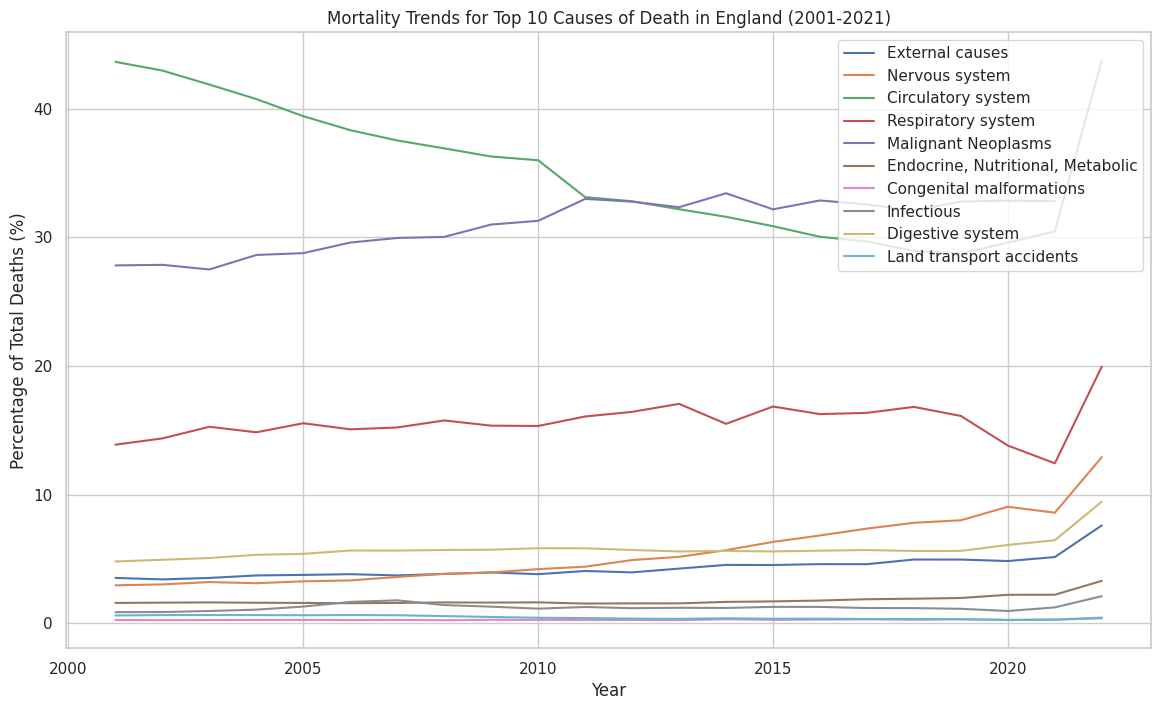

In [ ]:

# Calculate the total deaths per year
total_deaths_per_year = mortality_trends.sum(axis=1)

# Calculate the percentage of total deaths for each cause
percentage_trends = (mortality_trends.div(total_deaths_per_year, axis=0) * 100)


# Create a plot for each cause of death with percentage annotations
plt.figure(figsize=(14, 8))
for cause in top_10_death_causes:
    sns.lineplot(data=percentage_trends, x=percentage_trends.index, y=cause, label=cause)

plt.xlabel('Year')
plt.ylabel('Percentage of Total Deaths (%)')
plt.title('Mortality Trends for Top 10 Causes of Death in England (2001-2021)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

1. Circulatory System Diseases:

The number of deaths due to circulatory system diseases has shown a general decline over the years. This could indicate improvements in medical treatments, public health initiatives, or lifestyle changes.

2. Malignant Neoplasms (Cancer):

The death rates due to malignant neoplasms have remained relatively stable, with slight fluctuations. This suggests ongoing challenges in cancer treatment and prevention.
3. **Respiratory System Diseases:**

There is a noticeable increase in deaths from respiratory system diseases, particularly in the later years. This trend may reflect increasing environmental pollution, aging population, or emerging respiratory health challenges.
4. External Causes and Land Transport Accidents:

Deaths due to external causes and land transport accidents have been relatively stable, with minor variations. This stability could suggest consistent safety measures and public awareness campaigns.
5. Digestive System Diseases:

Death rates from digestive system diseases have shown minor fluctuations but no clear increasing or decreasing trend.
6. Endocrine, Nutritional, and Metabolic Diseases:

These diseases have seen a slight increase in death rates, which may be linked to lifestyle factors such as diet and physical activity.
7. Infectious Diseases:

There is an upward trend in deaths from infectious diseases, particularly in the later years. This could be due to emerging infectious threats or antibiotic resistance.
8. Nervous System Diseases:

There has been a slight increase in deaths due to nervous system diseases, possibly due to an aging population and the prevalence of neurodegenerative diseases.
9. Congenital Malformations:

The number of deaths from congenital malformations has remained relatively low and stable over the years.

In [ ]:
# Convert the 'Deaths' column to numeric, in case it contains any non-numeric data
mortality_data['Deaths'] = pd.to_numeric(mortality_data['Deaths'], errors='coerce')

# Summarize the mortality data by region and cause of death
mortality_summary = mortality_data.groupby(['Region name', 'Cause']).agg({'Deaths': 'sum'}).reset_index()

# Identify regions with high mortality rates and the leading causes of death
high_mortality_regions = mortality_summary.groupby('Region name').agg({
    'Deaths': 'sum'
}).sort_values(by='Deaths', ascending=False).reset_index()

# Find the leading cause of death in each region
leading_causes = mortality_summary.loc[mortality_summary.groupby('Region name')['Deaths'].idxmax()]

high_mortality_regions = high_mortality_regions.merge(leading_causes, on='Region name', suffixes=('_total', '_leading'))

high_mortality_regions


,Region name,Deaths_total,Cause,Deaths_leading
0,South East,2992687,Circulatory system,526318
1,North West,2845064,Circulatory system,472756
2,South West,2087080,Circulatory system,370438
3,West Midlands,2072837,Circulatory system,353994
4,East,2063466,Circulatory system,358824
5,Yorkshire and The Humber,2023389,Circulatory system,344816
6,London,1956917,Circulatory system,342708
7,East Midlands,1671453,Circulatory system,286018
8,Wales,1279152,Circulatory system,225111
9,North East,1098277,Circulatory system,175212


Regions with High Mortality Rates:
1. South East - The region with the highest total number of deaths, with approximately 2.99 million deaths.
2. North West - The second-highest, with around 2.85 million deaths.
3. South West - Following with about 2.08 million deaths.

Leading Causes of Death:
In all the top regions with high mortality rates, the Circulatory system is the leading cause of death. For instance:
1. South East: 526,318 deaths due to circulatory system issues.
2. North West: 472,756 deaths due to circulatory system issues.


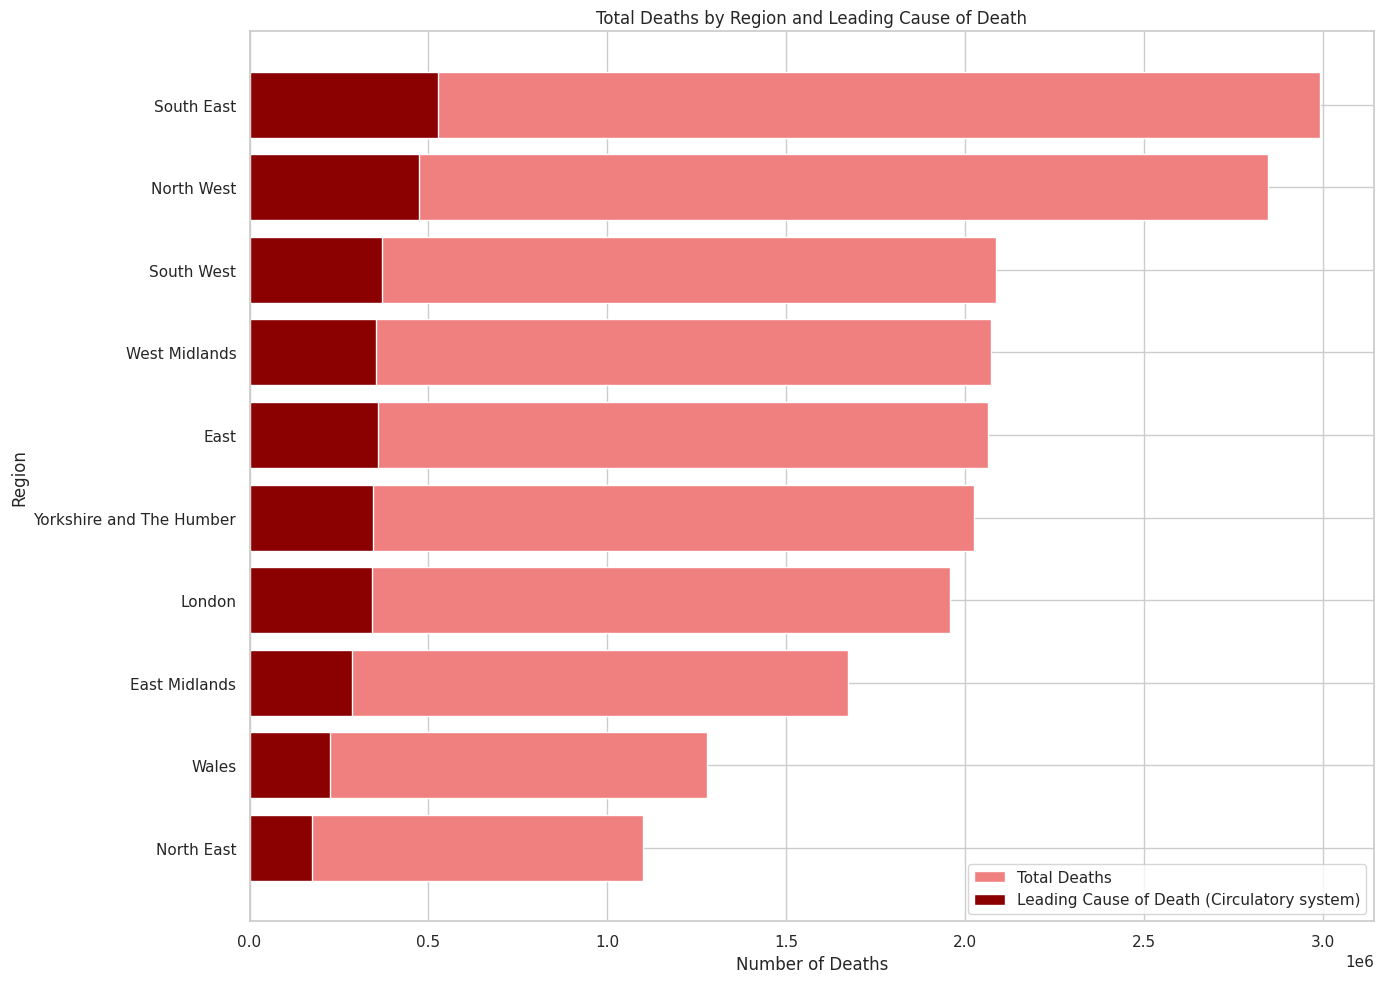

In [ ]:
# Create a bar chart to visualize the total deaths by region and the leading cause of death
plt.figure(figsize=(14, 10))

# Plot total deaths by region
plt.barh(high_mortality_regions['Region name'], high_mortality_regions['Deaths_total'], color='lightcoral', label='Total Deaths')

# Highlight the leading cause of death within the total deaths
plt.barh(high_mortality_regions['Region name'], high_mortality_regions['Deaths_leading'], color='darkred', label='Leading Cause of Death (Circulatory system)')

plt.xlabel('Number of Deaths')
plt.ylabel('Region')
plt.title('Total Deaths by Region and Leading Cause of Death')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.tight_layout()

# Show the plot
plt.show()


### Total traffic By Region

In [ ]:
# Summarize the vehicle counts by region
vehicle_counts_by_region = traffic_data.groupby('Region_name').agg({
    'cars_and_taxis': 'sum',
    'pedal_cycles': 'sum',
    'two_wheeled_motor_vehicles': 'sum',
    'buses_and_coaches': 'sum',
    'lgvs': 'sum',
    'all_hgvs': 'sum',
    'all_motor_vehicles': 'sum'
}).reset_index()

# Identify regions with high vehicle counts and common vehicle types
high_vehicle_counts = vehicle_counts_by_region.sort_values(by='all_motor_vehicles', ascending=False)

# Find the most common vehicle type in each region
high_vehicle_counts['most_common_vehicle_type'] = high_vehicle_counts.iloc[:, 1:7].idxmax(axis=1)

high_vehicle_counts


,Region_name,cars_and_taxis,pedal_cycles,two_wheeled_motor_vehicles,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,most_common_vehicle_type
6,South East,1220119331530,1.589797e+10,1.415082e+10,1.026310e+10,196526136872,7.195702e+10,1513016409471,cars_and_taxis
1,East of England,785956852829,1.333916e+10,9.198017e+09,7.626194e+09,141681991264,6.110452e+10,1005567576464,cars_and_taxis
4,North West,795625755525,8.783063e+09,6.731955e+09,9.162169e+09,125110201954,6.007311e+10,996703187479,cars_and_taxis
7,South West,722007822990,8.439046e+09,1.056000e+10,7.691631e+09,123309263051,4.321714e+10,906785859876,cars_and_taxis
9,West Midlands,691936319693,6.812708e+09,5.967696e+09,8.260665e+09,115396508062,5.711119e+10,878672379454,cars_and_taxis
5,Scotland,610493179180,5.410959e+09,4.974862e+09,1.059449e+10,111070465887,4.627883e+10,783411827278,cars_and_taxis
10,Yorkshire and the Humber,586758281306,8.450361e+09,6.028494e+09,7.017875e+09,104606193669,5.393640e+10,758347243110,cars_and_taxis
0,East Midlands,585971277799,7.312054e+09,6.241102e+09,6.309038e+09,100903868919,5.752230e+10,756947583596,cars_and_taxis
2,London,472477477601,1.174834e+10,1.392051e+10,9.936495e+09,77209630678,1.944926e+10,592993377804,cars_and_taxis
8,Wales,392406552505,3.095950e+09,3.938883e+09,4.600847e+09,69514023980,2.227570e+10,492736003911,cars_and_taxis


Regions with High Vehicle Counts:
1. South East - The region with the highest vehicle count, totaling over 1.5 trillion vehicles.
2. East of England - The second-highest, with just over 1 trillion vehicles.
3. North West - Close to East of England, with approximately 997 billion vehicles.

Common Vehicle Types:
In all regions, cars and taxis are the most common vehicle types by a significant margin. This suggests that private vehicle ownership and usage dominate traffic patterns across these regions.

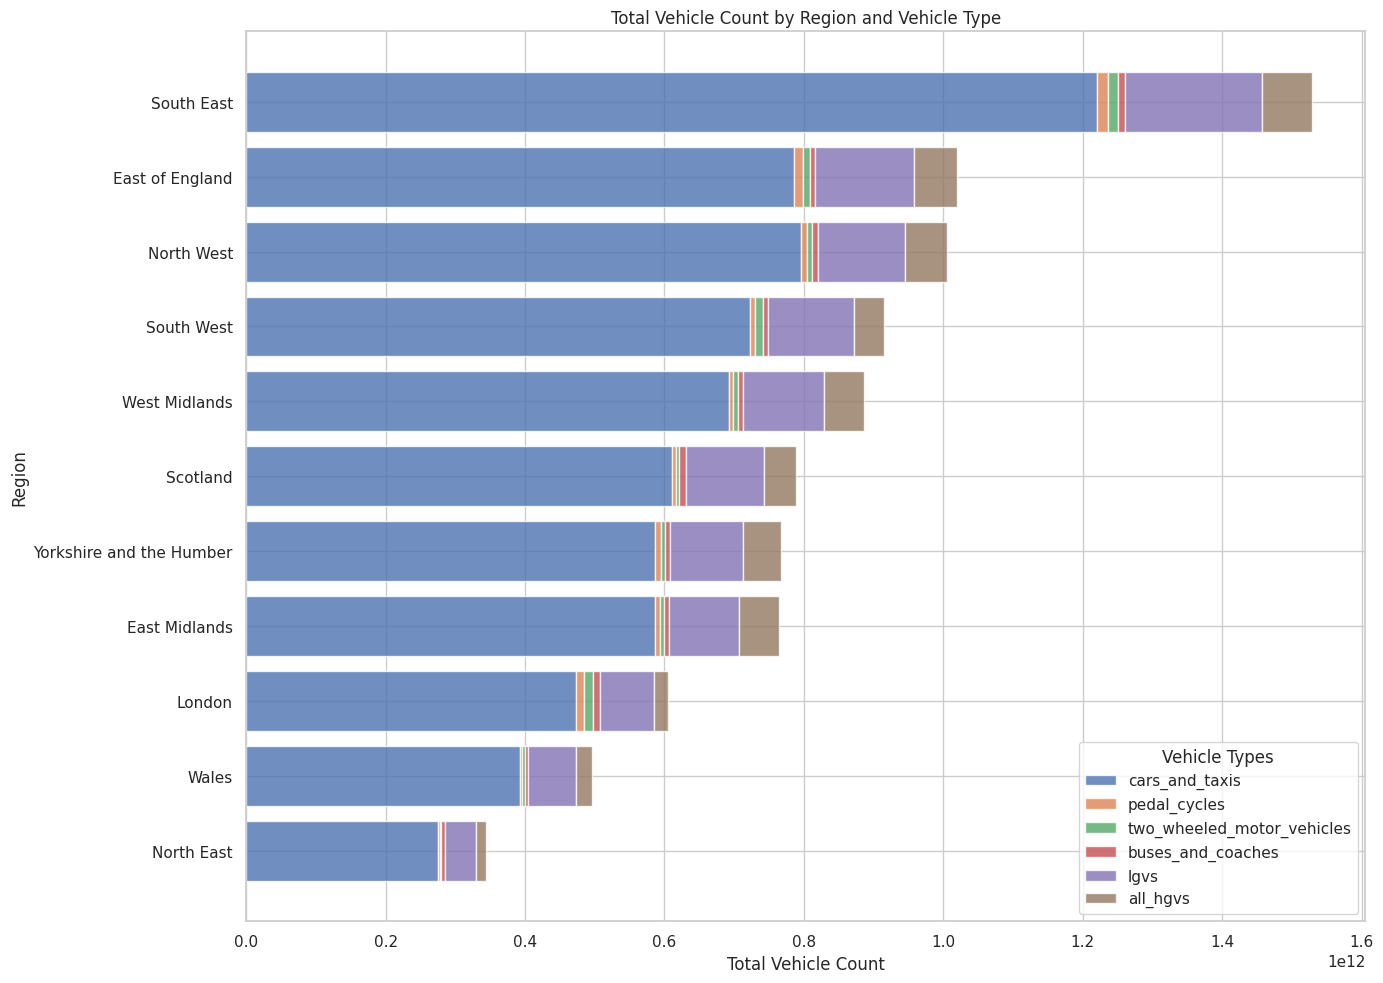

In [ ]:
# Create a stacked bar chart to include vehicle types along with total vehicle count
vehicle_types = ['cars_and_taxis', 'pedal_cycles', 'two_wheeled_motor_vehicles', 'buses_and_coaches', 'lgvs', 'all_hgvs']

# Plotting the data
plt.figure(figsize=(14, 10))

# Plot each vehicle type as a stacked bar
bottom = None
for vehicle_type in vehicle_types:
    plt.barh(high_vehicle_counts['Region_name'], high_vehicle_counts[vehicle_type],
             left=bottom, label=vehicle_type, alpha=0.8)
    if bottom is None:
        bottom = high_vehicle_counts[vehicle_type].copy()
    else:
        bottom += high_vehicle_counts[vehicle_type]

plt.xlabel('Total Vehicle Count')
plt.ylabel('Region')
plt.title('Total Vehicle Count by Region and Vehicle Type')
plt.legend(title="Vehicle Types")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-84-f29144e3efaa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_traffic_by_region.values, y=total_traffic_by_region.index, palette="viridis")


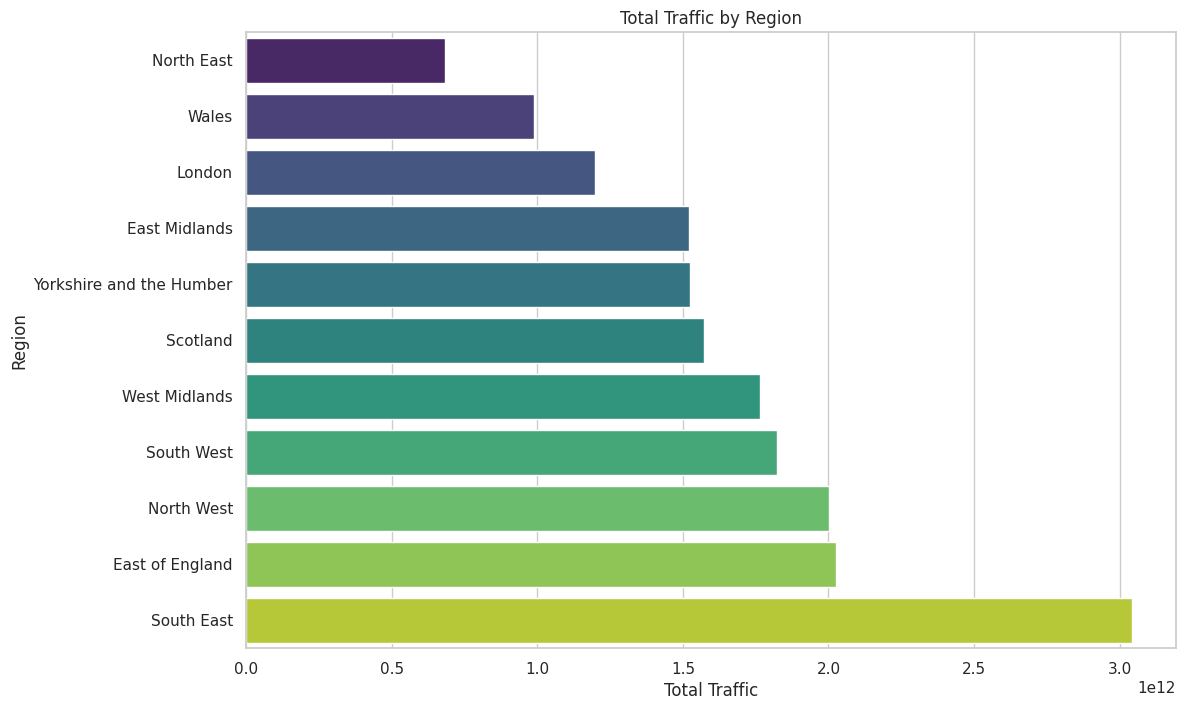

In [ ]:
# Calculate total traffic per region
traffic_data['total_traffic'] = traffic_data.loc[:, 'pedal_cycles':'all_motor_vehicles'].sum(axis=1)
total_traffic_by_region = traffic_data.groupby('Region_name')['total_traffic'].sum().sort_values()

# Plot the total traffic by region
plt.figure(figsize=(12, 8))
sns.barplot(x=total_traffic_by_region.values, y=total_traffic_by_region.index, palette="viridis")
plt.title('Total Traffic by Region')
plt.xlabel('Total Traffic')
plt.ylabel('Region')
plt.show()


In [ ]:
# Filter the data for the years 2016 to 2021
traffic_data_filtered = traffic_data[(traffic_data['year'] >= 2016) & (traffic_data['year'] <= 2021)]

# Summarize motor vehicle counts over the years
vehicle_trends = traffic_data_filtered.groupby('year')['all_motor_vehicles'].sum()


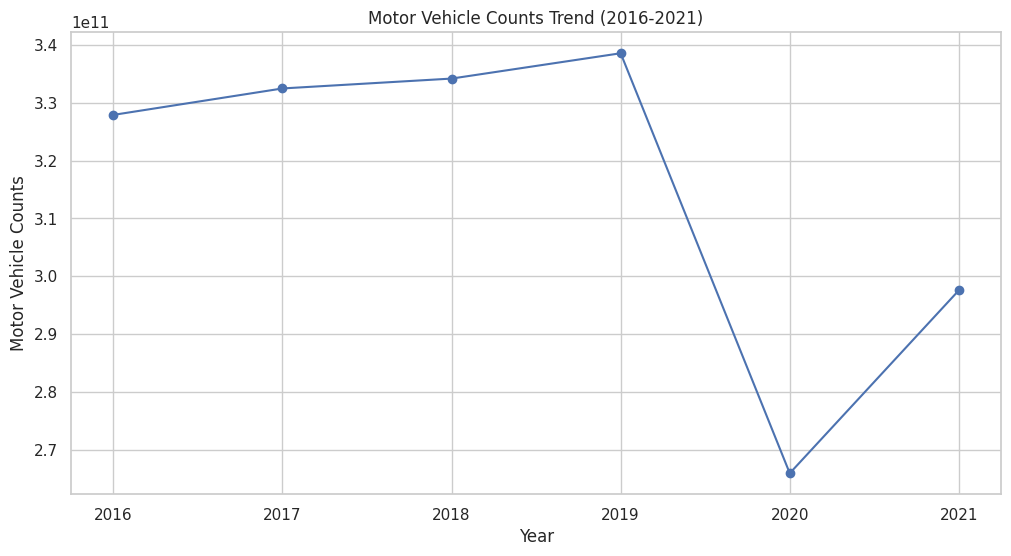

In [ ]:
# Visualize the trend of motor vehicle counts from 2016 to 2021
plt.figure(figsize=(12, 6))
plt.plot(vehicle_trends.index, vehicle_trends.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Motor Vehicle Counts')
plt.title('Motor Vehicle Counts Trend (2016-2021)')
plt.grid(True)
plt.show()


**Insights from Motor Vehicle Counts Trends (2016-2021)
General Trend** :

From 2016 to 2019, there was a consistent increase in the total number of motor vehicles. This reflects a growing trend in vehicle usage over these years.
Impact of COVID-19:

In 2020, there was a significant drop in motor vehicle counts, likely due to the COVID-19 pandemic and the resulting lockdowns, restrictions, and changes in transportation behavior.
In 2021, the number of motor vehicles increased again but did not return to pre-pandemic levels, indicating a partial recovery.


## GHG

In [ ]:
# Extract relevant CO2 data for transport emissions from the sheets
co2_emissions_data = df_1_2[df_1_2['Calendar Year'].between(2016, 2021)]
# Extract relevant CH4 data for transport emissions from the sheets
ch4_emissions_data = df_1_3[df_1_3['Calendar Year'].between(2016, 2021)]
# Extract relevant N2O data for transport emissions from the sheets
n2o_emissions_data = df_1_4[df_1_4['Calendar Year'].between(2016, 2021)]

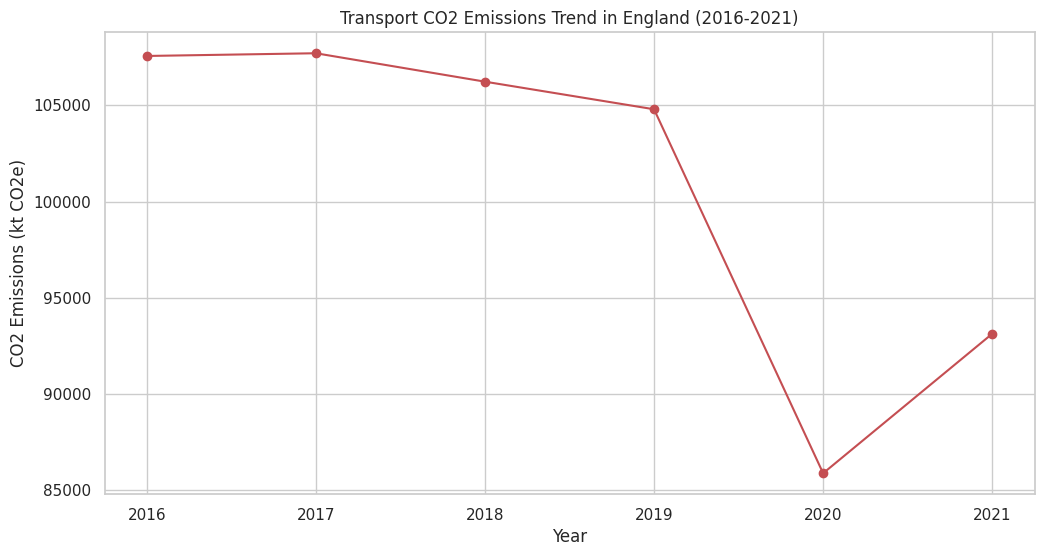

In [ ]:
# Filter the data for "England Total" in the Region/Country column and for the years 2016 to 2021
co2_england_total = co2_emissions_data[co2_emissions_data['Region/Country'] == 'England Total']
ch4_england_total = ch4_emissions_data[ch4_emissions_data['Region/Country'] == 'England Total']
n2o_england_total = n2o_emissions_data[n2o_emissions_data['Region/Country'] == 'England Total']

# Summarize emissions for England Total over the years
co2_england_trends = co2_england_total.groupby('Calendar Year')['Transport Total'].sum()
ch4_england_trends = ch4_england_total.groupby('Calendar Year')['Transport Total'].sum()
n2o_england_trends = n2o_england_total.groupby('Calendar Year')['Transport Total'].sum()

# Visualize the CO2 emissions trends for England Total
plt.figure(figsize=(12, 6))
plt.plot(co2_england_trends.index, co2_england_trends.values, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt CO2e)')
plt.title('Transport CO2 Emissions Trend in England (2016-2021)')
plt.grid(True)
plt.show()

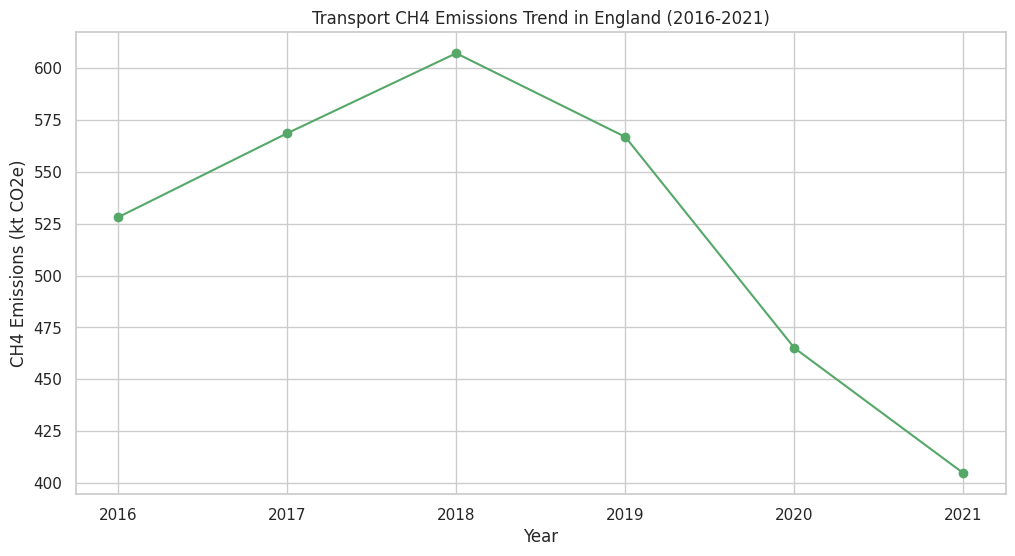

In [ ]:
# Visualize the CH4 emissions trends for England Total
plt.figure(figsize=(12, 6))
plt.plot(ch4_england_trends.index, ch4_england_trends.values, marker='o', linestyle='-', color='g')
plt.xlabel('Year')
plt.ylabel('CH4 Emissions (kt CO2e)')
plt.title('Transport CH4 Emissions Trend in England (2016-2021)')
plt.grid(True)
plt.show()


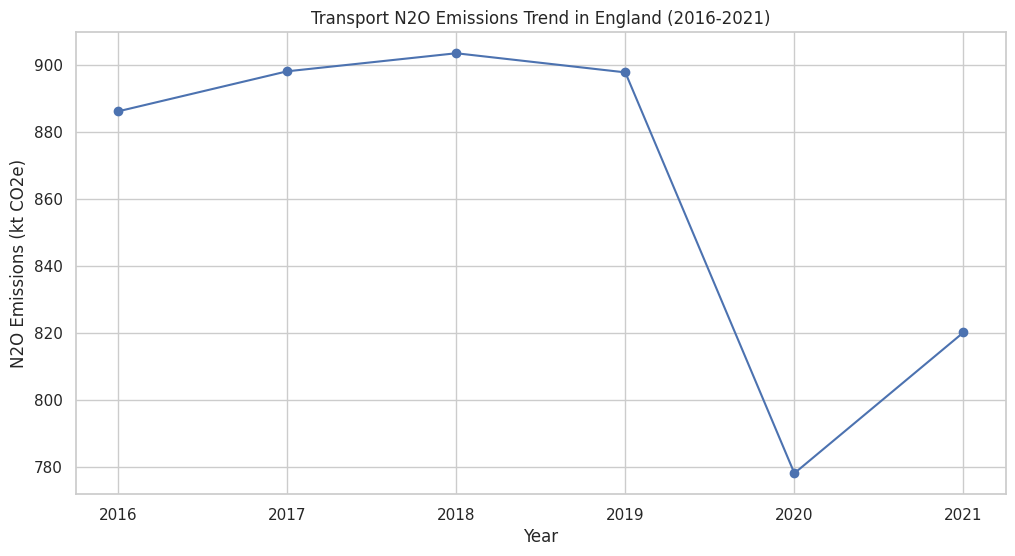

In [ ]:
# Visualize the N2O emissions trends for England Total
plt.figure(figsize=(12, 6))
plt.plot(n2o_england_trends.index, n2o_england_trends.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('N2O Emissions (kt CO2e)')
plt.title('Transport N2O Emissions Trend in England (2016-2021)')
plt.grid(True)
plt.show()


**Insights from Transport GHG Emissions Trends in England (2016-2021)**

1. **CO2 Emissions**:

The CO2 emissions from transport in England showed a gradual decrease from 2016 to 2019.
There was a significant reduction in 2020, followed by a partial rebound in 2021.
2. **CH4 Emissions**:

The CH4 emissions from transport in England remained relatively stable from 2016 to 2019.
Similar to CO2 emissions, there was a noticeable drop in 2020 and a partial increase in 2021.
3. **N2O Emissions:**

The N2O emissions also showed a stable trend from 2016 to 2019, a significant reduction in 2020, and a slight recovery in 2021.

In [ ]:
# Filter out the "England Total" from the datasets
co2_data_filtered = co2_emissions_data[co2_emissions_data['Region/Country'] != 'England Total']
ch4_data_filtered = ch4_emissions_data[ch4_emissions_data['Region/Country'] != 'England Total']
n2o_data_filtered = n2o_emissions_data[n2o_emissions_data['Region/Country'] != 'England Total']

# Group by region and year, and sum up the transport emissions for each gas
co2_region_trends = co2_data_filtered.groupby(['Region/Country', 'Calendar Year'])['Transport Total'].sum().reset_index()
ch4_region_trends = ch4_data_filtered.groupby(['Region/Country', 'Calendar Year'])['Transport Total'].sum().reset_index()
n2o_region_trends = n2o_data_filtered.groupby(['Region/Country', 'Calendar Year'])['Transport Total'].sum().reset_index()


# Convert the 'Transport Total' column to numeric values for all gases
co2_region_trends['Transport Total'] = pd.to_numeric(co2_region_trends['Transport Total'], errors='coerce')
ch4_region_trends['Transport Total'] = pd.to_numeric(ch4_region_trends['Transport Total'], errors='coerce')
n2o_region_trends['Transport Total'] = pd.to_numeric(n2o_region_trends['Transport Total'], errors='coerce')

# Exclude the "National Total" from the datasets
co2_data_filtered = co2_region_trends[co2_region_trends['Region/Country'] != 'National Total']
ch4_data_filtered = ch4_region_trends[ch4_region_trends['Region/Country'] != 'National Total']
n2o_data_filtered = n2o_region_trends[n2o_region_trends['Region/Country'] != 'National Total']

# Find the regions with the highest emissions for each gas over the period
highest_co2_region = co2_data_filtered.groupby('Region/Country')['Transport Total'].sum().idxmax()
highest_ch4_region = ch4_data_filtered.groupby('Region/Country')['Transport Total'].sum().idxmax()
highest_n2o_region = n2o_data_filtered.groupby('Region/Country')['Transport Total'].sum().idxmax()

highest_co2_region_total = co2_data_filtered[co2_data_filtered['Region/Country'] == highest_co2_region]
highest_ch4_region_total = ch4_data_filtered[ch4_data_filtered['Region/Country'] == highest_ch4_region]
highest_n2o_region_total = n2o_data_filtered[n2o_data_filtered['Region/Country'] == highest_n2o_region]

# Display the highest regions excluding "National Total"
highest_co2_region_total, highest_ch4_region_total, highest_n2o_region_total



(   Region/Country  Calendar Year  Transport Total
 90     South East           2016     34679.416678
 91     South East           2017     34490.596567
 92     South East           2018     33736.951542
 93     South East           2019     33003.040035
 94     South East           2020     26491.579345
 95     South East           2021     28407.468860,
    Region/Country  Calendar Year  Transport Total
 90     South East           2016       165.939092
 91     South East           2017       178.036609
 92     South East           2018       188.909730
 93     South East           2019       174.659516
 94     South East           2020       140.357854
 95     South East           2021       119.999076,
    Region/Country  Calendar Year  Transport Total
 90     South East           2016       266.019119
 91     South East           2017       267.398395
 92     South East           2018       266.344101
 93     South East           2019       262.469288
 94     South East           

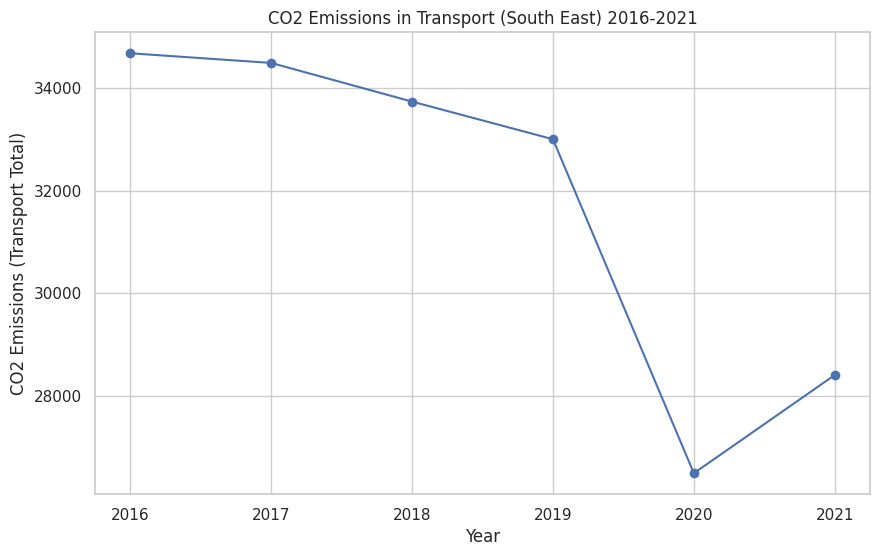

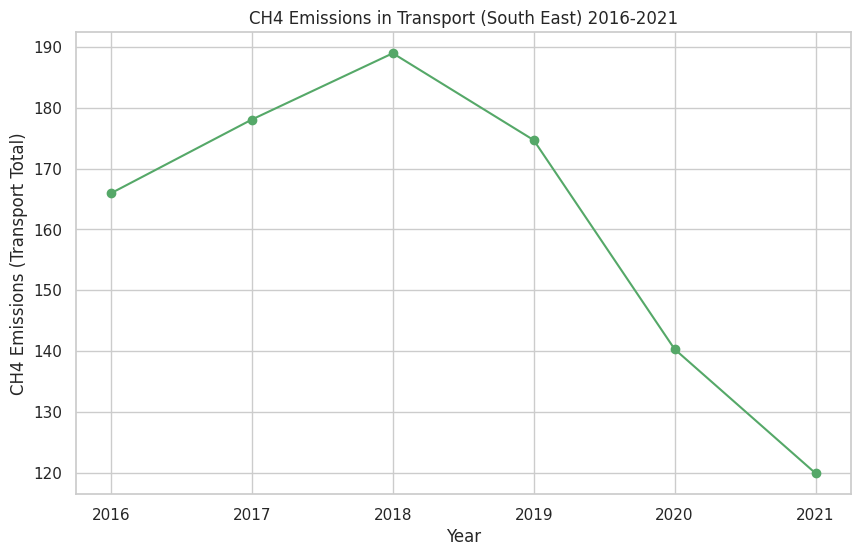

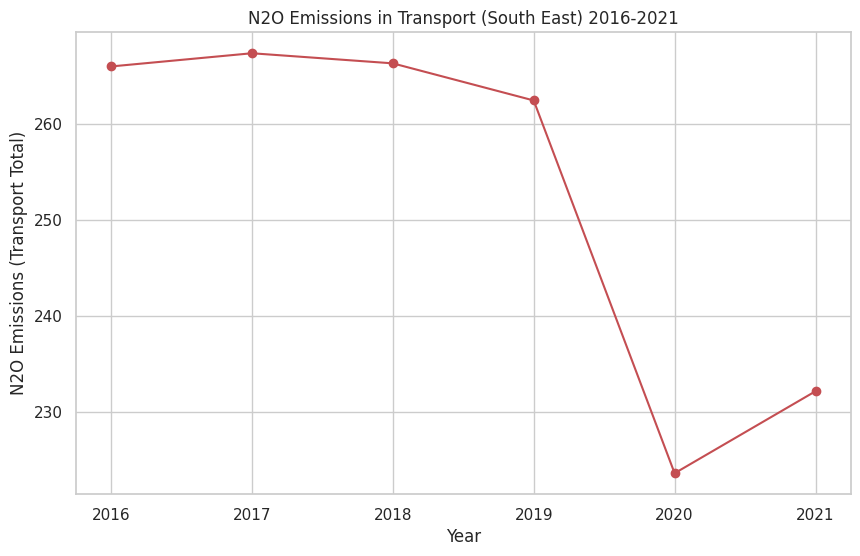

In [ ]:
# Plotting the trends for the South East region for CO2, CH4, and N2O emissions

# CO2 Trends
plt.figure(figsize=(10, 6))
plt.plot(highest_co2_region_total['Calendar Year'], highest_co2_region_total['Transport Total'], marker='o', linestyle='-', color='b')
plt.title('CO2 Emissions in Transport (South East) 2016-2021')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Transport Total)')
plt.grid(True)
plt.show()

# CH4 Trends
plt.figure(figsize=(10, 6))
plt.plot(highest_ch4_region_total['Calendar Year'], highest_ch4_region_total['Transport Total'], marker='o', linestyle='-', color='g')
plt.title('CH4 Emissions in Transport (South East) 2016-2021')
plt.xlabel('Year')
plt.ylabel('CH4 Emissions (Transport Total)')
plt.grid(True)
plt.show()

# N2O Trends
plt.figure(figsize=(10, 6))
plt.plot(highest_n2o_region_total['Calendar Year'], highest_n2o_region_total['Transport Total'], marker='o', linestyle='-', color='r')
plt.title('N2O Emissions in Transport (South East) 2016-2021')
plt.xlabel('Year')
plt.ylabel('N2O Emissions (Transport Total)')
plt.grid(True)
plt.show()


# Correlation Analysis / Traffic - Mortality

In [ ]:
mortality_trends.sum(axis=1).loc[2016:2021]

,0
Year,
2016,443544
2017,448361
2018,455254
2019,448729
2020,448064
2021,440423


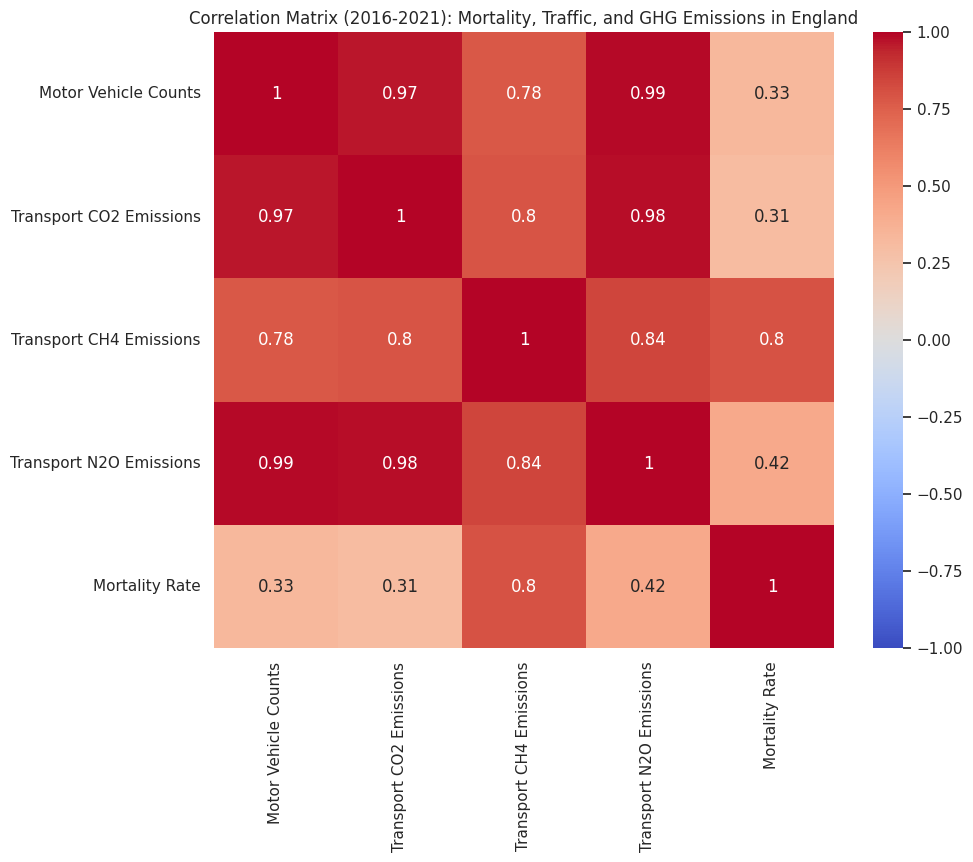

,Motor Vehicle Counts,Transport CO2 Emissions,Transport CH4 Emissions,Transport N2O Emissions,Mortality Rate
Motor Vehicle Counts,1.000000,0.968699,0.778785,0.991042,0.328242
Transport CO2 Emissions,0.968699,1.000000,0.795949,0.982031,0.310490
Transport CH4 Emissions,0.778785,0.795949,1.000000,0.843828,0.800729
Transport N2O Emissions,0.991042,0.982031,0.843828,1.000000,0.416441
Mortality Rate,0.328242,0.310490,0.800729,0.416441,1.000000


In [ ]:
# Combine the summarized data for correlation analysis
correlation_data_england = pd.DataFrame({
    'Motor Vehicle Counts': vehicle_trends,
    'Transport CO2 Emissions': co2_england_trends,
    'Transport CH4 Emissions': ch4_england_trends,
    'Transport N2O Emissions': n2o_england_trends,
    # Assuming mortality trends are aggregated by year for simplicity
    'Mortality Rate': mortality_trends.sum(axis=1).loc[2016:2021]
})

# Calculate the correlation matrix
correlation_matrix_england = correlation_data_england.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_england, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (2016-2021): Mortality, Traffic, and GHG Emissions in England')
plt.show()

correlation_matrix_england

**Insights from the Correlation Matrix (2016-2021)**
1. Motor Vehicle Counts and Transport CO2 Emissions:

There is a very strong positive correlation (0.97) between motor vehicle counts and CO2 emissions. This indicates that an increase in vehicle counts leads to higher CO2 emissions.
2. Motor Vehicle Counts and Transport CH4 Emissions:

There is a strong positive correlation (0.78) between motor vehicle counts and CH4 emissions.
3. Motor Vehicle Counts and Transport N2O Emissions:

There is a very strong positive correlation (0.99) between motor vehicle counts and N2O emissions.
4. Motor Vehicle Counts and Mortality Rate:

There is a moderate positive correlation (0.33) between motor vehicle counts and the mortality rate, suggesting that higher vehicle counts might contribute to increased mortality rates.
5. Transport CO2 Emissions and Mortality Rate:

There is a moderate positive correlation (0.31) between CO2 emissions and mortality rate.
6. Transport CH4 Emissions and Mortality Rate:

There is a strong positive correlation (0.80) between CH4 emissions and mortality rate, indicating that higher CH4 emissions might be strongly associated with higher mortality rates.
7. Transport N2O Emissions and Mortality Rate:

There is a moderate positive correlation (0.42) between N2O emissions and mortality rate.

**Summary**

* The analysis shows strong correlations between motor vehicle counts and various GHG emissions (CO2, CH4, and N2O), highlighting the significant impact of transportation on greenhouse gas levels.
* There is a moderate to strong correlation between transportation-related GHG emissions (especially CH4) and mortality rates, suggesting potential health impacts related to increased emissions.
* These findings emphasize the need for targeted measures to reduce vehicle emissions and improve transportation efficiency, which could positively impact both environmental and public health, supporting the UK's net-zero emissions goal by 2050.

**SUMMARY**


1. Mortality Rates:

Certain causes of death, such as respiratory diseases, showed an increasing trend, while others like circulatory system diseases showed a decline.
2. Motor Vehicle Counts:

There was a steady increase in motor vehicle counts until 2019, followed by a significant drop in 2020 due to COVID-19, with a partial recovery in 2021.
3. Transport-Related GHG Emissions:

Transport-related GHG emissions showed a gradual decline until 2019, a sharp drop in 2020 due to the pandemic, and a partial rebound in 2021.


# Validation

## Statistical Significance Testing

In [ ]:
from scipy.stats import pearsonr

# Calculate p-values for the correlations
correlation_pvalues = {
    'Motor Vehicle Counts vs Mortality Rate': pearsonr(correlation_data_england['Motor Vehicle Counts'], correlation_data_england['Mortality Rate']),
    'Transport CO2 Emissions vs Mortality Rate': pearsonr(correlation_data_england['Transport CO2 Emissions'], correlation_data_england['Mortality Rate']),
    'Transport CH4 Emissions vs Mortality Rate': pearsonr(correlation_data_england['Transport CH4 Emissions'], correlation_data_england['Mortality Rate']),
    'Transport N2O Emissions vs Mortality Rate': pearsonr(correlation_data_england['Transport N2O Emissions'], correlation_data_england['Mortality Rate'])
}

correlation_pvalues


{'Motor Vehicle Counts vs Mortality Rate': PearsonRResult(statistic=0.328242224421944, pvalue=0.5253195574494596),
 'Transport CO2 Emissions vs Mortality Rate': PearsonRResult(statistic=0.31048965793241345, pvalue=0.5492317088417128),
 'Transport CH4 Emissions vs Mortality Rate': PearsonRResult(statistic=0.8007288459408729, pvalue=0.05560706084520279),
 'Transport N2O Emissions vs Mortality Rate': PearsonRResult(statistic=0.4164412068781851, pvalue=0.4114484894419625)}

## Regression Analysis

In [ ]:
import statsmodels.api as sm

# Ensure all columns are numeric
correlation_data_england_clean = correlation_data_england.apply(pd.to_numeric, errors='coerce')

# Drop any remaining rows with missing values
correlation_data_england_clean = correlation_data_england_clean.dropna()

# Prepare the data again
X_motor_vehicles = sm.add_constant(correlation_data_england_clean['Motor Vehicle Counts'])
X_co2 = sm.add_constant(correlation_data_england_clean['Transport CO2 Emissions'])
X_ch4 = sm.add_constant(correlation_data_england_clean['Transport CH4 Emissions'])
X_n2o = sm.add_constant(correlation_data_england_clean['Transport N2O Emissions'])
y = correlation_data_england_clean['Mortality Rate']

# Simple Linear Regression: Motor Vehicle Counts vs Mortality Rate
model_motor_vehicles = sm.OLS(y, X_motor_vehicles).fit()
summary_motor_vehicles = model_motor_vehicles.summary()

# Simple Linear Regression: CO2 Emissions vs Mortality Rate
model_co2 = sm.OLS(y, X_co2).fit()
summary_co2 = model_co2.summary()

# Simple Linear Regression: CH4 Emissions vs Mortality Rate
model_ch4 = sm.OLS(y, X_ch4).fit()
summary_ch4 = model_ch4.summary()

# Simple Linear Regression: N2O Emissions vs Mortality Rate
model_n2o = sm.OLS(y, X_n2o).fit()
summary_n2o = model_n2o.summary()

# Prepare the data for multiple linear regression
X_all = sm.add_constant(correlation_data_england_clean[['Motor Vehicle Counts', 'Transport CO2 Emissions', 'Transport CH4 Emissions', 'Transport N2O Emissions']])

# Multiple Linear Regression
model_all = sm.OLS(y, X_all).fit()
summary_all = model_all.summary()

summary_motor_vehicles, summary_co2, summary_ch4, summary_n2o, summary_all


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         Mortality Rate   R-squared:                       0.108
 Model:                            OLS   Adj. R-squared:                 -0.115
 Method:                 Least Squares   F-statistic:                    0.4830
 Date:                Thu, 29 Aug 2024   Prob (F-statistic):              0.525
 Time:                        10:29:54   Log-Likelihood:                -58.807
 No. Observations:                   6   AIC:                             121.6
 Df Residuals:                       4   BIC:                             121.2
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------

# GHH Emissions Goal

In [ ]:
import pandas as pd

# Load the spreadsheet
file_path = 'veh0142.xlsx'
spreadsheet = pd.ExcelFile(file_path)

# Check sheet names to find the relevant sheet
spreadsheet.sheet_names

['Cover_sheet', 'Contents', 'Notes', 'VEH0142']

In [ ]:
# Load the relevant sheet
sheet_name = 'VEH0142'
# Skip the first few rows to get to the actual data
df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=4)

df.head()


,Units,BodyType,Fuel,Keepership [note 3],ONS Sort [note 6],ONS Code [note 6],ONS Geography [note 6],2024 Q1,2023 Q4,2023 Q3,...,2012 Q1,2011 Q4,2011 Q3,2011 Q2,2011 Q1,2010 Q4,2010 Q3,2010 Q2,2010 Q1,2009 Q4
0,Number,Buses and coaches,Battery electric,Company,1,K02000001,United Kingdom,3697,3293,2961,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
1,Number,Buses and coaches,Battery electric,Company,2,K03000001,Great Britain,3554,3164,2832,...,54,58,57,59,58,49,45,41,40,38
2,Number,Buses and coaches,Battery electric,Company,3,E92000001,England,2824,2486,2162,...,51,55,54,57,55,46,43,39,38,36
3,Number,Buses and coaches,Battery electric,Company,4,E12000001,North East,27,26,22,...,7,12,12,13,14,7,5,4,4,4
4,Number,Buses and coaches,Battery electric,Company,5,E06000047,County Durham,1,1,1,...,0,0,3,3,3,3,1,0,0,0


In [ ]:
import matplotlib.pyplot as plt

# Filter the data for England
england_data = df[df['ONS Geography [note 6]'] == 'England']

# Extract the relevant columns for EV growth analysis
ev_columns = england_data.columns[7:]

# Convert the data to long format for easier plotting
england_ev_data = england_data.melt(id_vars=['BodyType', 'Fuel', 'Keepership [note 3]', 'ONS Geography [note 6]'],
                                    value_vars=ev_columns,
                                    var_name='Quarter',
                                    value_name='EV_Count')



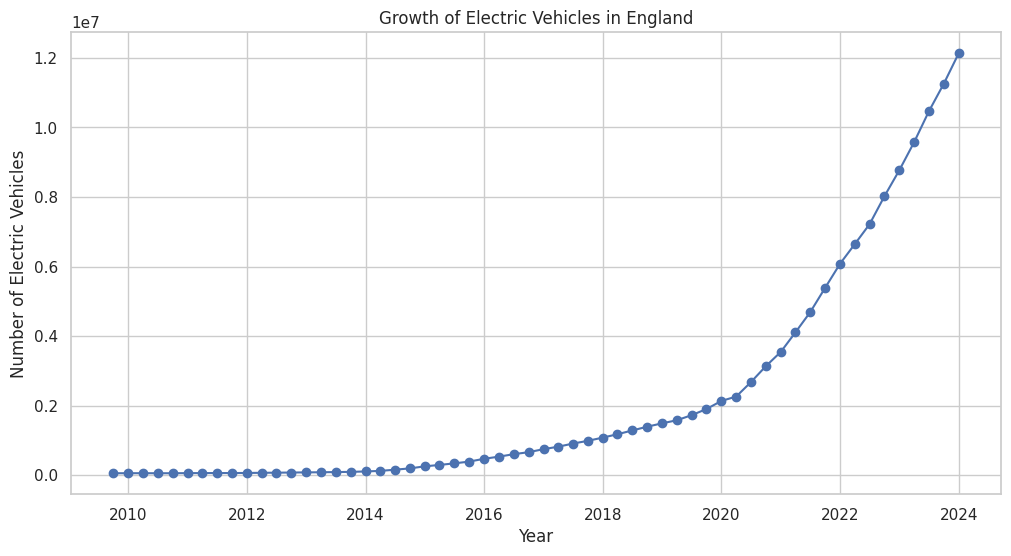

In [ ]:
# Correct the datetime conversion
# Convert the quarter format from 'YYYY Qx' to a proper datetime format
england_ev_data['Quarter'] = england_ev_data['Quarter'].str.replace(' Q', 'Q')
england_ev_data['Quarter'] = pd.PeriodIndex(england_ev_data['Quarter'], freq='Q').to_timestamp()

# Aggregate the data to get the total number of EVs in each quarter
total_ev_counts = england_ev_data.groupby('Quarter')['EV_Count'].sum().reset_index()

# Plot the growth of EVs in England
plt.figure(figsize=(12, 6))
plt.plot(total_ev_counts['Quarter'], total_ev_counts['EV_Count'], marker='o')
plt.title('Growth of Electric Vehicles in England')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.grid(True)
plt.show()


## EV Region Analysis

In [ ]:
# Let's load the original data again without filtering for England to check the unique values

# Load the original sheet again
df_original = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=4)

# Check the unique values in the 'ONS Geography [note 6]' column
unique_regions_original = df_original['ONS Geography [note 6]'].unique()

unique_regions_original


array(['United Kingdom', 'Great Britain', 'England', 'North East',
       '   County Durham', '   Darlington', '   Hartlepool',
       '   Middlesbrough', '   Northumberland', '   Redcar and Cleveland',
       '   Stockton-on-Tees', '   Tyne and Wear (Met County)',
       '      Gateshead', '      Newcastle upon Tyne',
       '      North Tyneside', '      South Tyneside', '      Sunderland',
       '   Local Authority unknown within North East', 'North West',
       '   Blackburn with Darwen', '   Blackpool', '   Cheshire East',
       '   Cheshire West and Chester', '   Halton', '   Warrington',
       '   Cumbria', '      Allerdale', '      Barrow-in-Furness',
       '      Carlisle', '      Copeland', '      Eden',
       '      South Lakeland', '   Greater Manchester (Met County)',
       '      Bolton', '      Bury', '      Manchester', '      Oldham',
       '      Rochdale', '      Salford', '      Stockport',
       '      Tameside', '      Trafford', '      Wigan', '   Lancas

In [ ]:
# Load the Lookup dataset
local_authority_lookup_path = 'Local_Authority_District_to_Region_(December_2022)_Lookup_in_England.csv'
local_authority_lookup = pd.read_csv(local_authority_lookup_path)

# Check the unique regions in the lookup dataset
unique_regions_lookup = local_authority_lookup['RGN22NM'].unique()

unique_regions_lookup


array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'East of England', 'London',
       'South East', 'South West'], dtype=object)

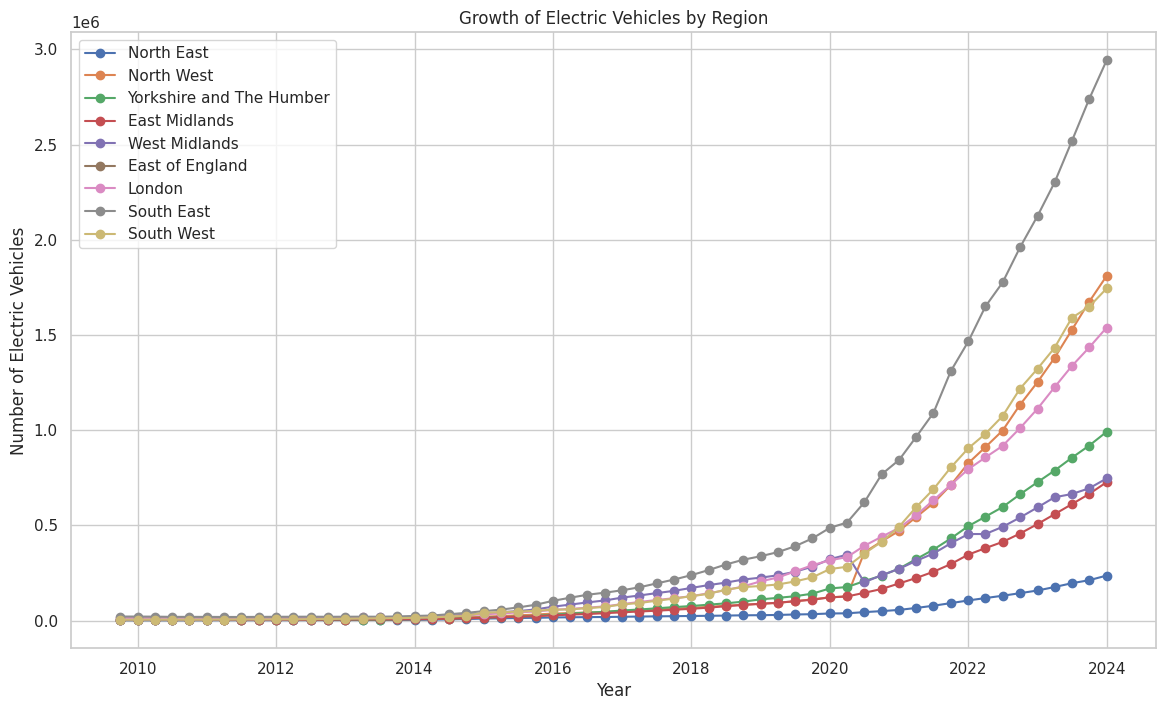

In [ ]:
# Filter the original dataset to only include relevant regions based on the lookup
relevant_regions = local_authority_lookup['RGN22NM'].unique()
filtered_ev_data_relevant_regions = df_original[df_original['ONS Geography [note 6]'].isin(relevant_regions)]

# Convert the data to long format for easier plotting
ev_columns_relevant = filtered_ev_data_relevant_regions.columns[7:]
filtered_ev_data_long = filtered_ev_data_relevant_regions.melt(id_vars=['BodyType', 'Fuel', 'Keepership [note 3]', 'ONS Geography [note 6]'],
                                                              value_vars=ev_columns_relevant,
                                                              var_name='Quarter',
                                                              value_name='EV_Count')

# Correct the datetime conversion
filtered_ev_data_long['Quarter'] = filtered_ev_data_long['Quarter'].str.replace(' Q', 'Q')
filtered_ev_data_long['Quarter'] = pd.PeriodIndex(filtered_ev_data_long['Quarter'], freq='Q').to_timestamp()

# Convert the 'EV_Count' to numeric
filtered_ev_data_long['EV_Count'] = pd.to_numeric(filtered_ev_data_long['EV_Count'], errors='coerce')

# Aggregate the data to get the total number of EVs in each quarter for each region
region_ev_growth = filtered_ev_data_long.groupby(['ONS Geography [note 6]', 'Quarter'])['EV_Count'].sum().reset_index()

# Plot the growth of EVs in each relevant region
plt.figure(figsize=(14, 8))
for region in relevant_regions:
    region_data = region_ev_growth[region_ev_growth['ONS Geography [note 6]'] == region]
    plt.plot(region_data['Quarter'], region_data['EV_Count'], marker='o', label=region)

plt.title('Growth of Electric Vehicles by Region')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate the total growth from the first available quarter to the last for each region
initial_ev_count = region_ev_growth.groupby('ONS Geography [note 6]')['EV_Count'].first().reset_index()
final_ev_count = region_ev_growth.groupby('ONS Geography [note 6]')['EV_Count'].last().reset_index()

# Merge initial and final counts to calculate total growth
total_growth = pd.merge(initial_ev_count, final_ev_count, on='ONS Geography [note 6]', suffixes=('_initial', '_final'))
total_growth['Total_Growth'] = total_growth['EV_Count_final'] - total_growth['EV_Count_initial']

# Find the region with the highest total growth
fastest_growing_region_total = total_growth.loc[total_growth['Total_Growth'].idxmax()]

fastest_growing_region_total


,4
ONS Geography [note 6],South East
EV_Count_initial,21232
EV_Count_final,2942968
Total_Growth,2921736


## Model Build

In [ ]:
# Calculate the historical growth rate of EVs
total_ev_counts['Year'] = total_ev_counts['Quarter'].dt.year
annual_ev_counts = total_ev_counts.groupby('Year')['EV_Count'].sum().reset_index()
# Ensure that EV_Count is correctly converted to numeric
annual_ev_counts['EV_Count'] = pd.to_numeric(annual_ev_counts['EV_Count'], errors='coerce')

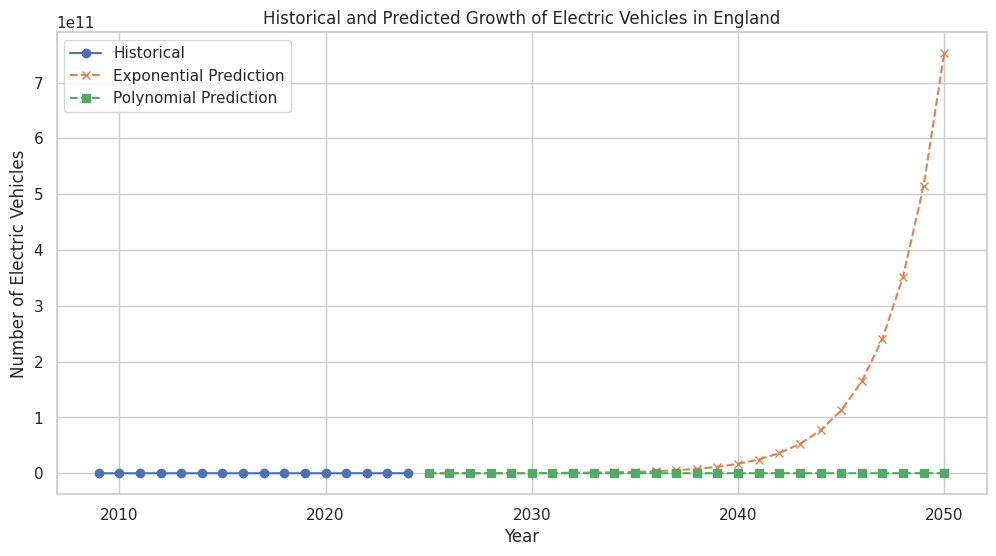

,Year,Exponential_Prediction,Polynomial_Prediction
0,2025,5.607618e+07,2.373207e+07
1,2026,8.201356e+07,2.675844e+07
2,2027,1.199480e+08,2.995063e+07
3,2028,1.754285e+08,3.330864e+07
4,2029,2.565709e+08,3.683247e+07


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X = annual_ev_counts[['Year']].values
y = annual_ev_counts['EV_Count'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit an exponential growth model
log_y_train = np.log(y_train)
linear_model = LinearRegression()
linear_model.fit(X_train, log_y_train)

# Predict using the exponential growth model
log_y_pred = linear_model.predict(X_test)
y_pred_exp = np.exp(log_y_pred)

# Calculate the mean squared error for the exponential model
mse_exp = mean_squared_error(y_test, y_pred_exp)

# Create and fit a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict using the polynomial regression model
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate the mean squared error for the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Predict future values using both models
future_years = np.arange(annual_ev_counts['Year'].iloc[-1] + 1, 2051).reshape(-1, 1)
future_years_poly = poly.transform(future_years)

# Exponential growth predictions
future_log_y_pred_exp = linear_model.predict(future_years)
future_y_pred_exp = np.exp(future_log_y_pred_exp)

# Polynomial regression predictions
future_y_pred_poly = poly_model.predict(future_years_poly)

# Create a dataframe for the predictions
predictions_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Exponential_Prediction': future_y_pred_exp,
    'Polynomial_Prediction': future_y_pred_poly
})

# Plot the historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(annual_ev_counts['Year'], annual_ev_counts['EV_Count'], marker='o', label='Historical')
plt.plot(predictions_df['Year'], predictions_df['Exponential_Prediction'], marker='x', linestyle='--', label='Exponential Prediction')
plt.plot(predictions_df['Year'], predictions_df['Polynomial_Prediction'], marker='s', linestyle='--', label='Polynomial Prediction')
plt.title('Historical and Predicted Growth of Electric Vehicles in England')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.grid(True)
plt.show()

predictions_df.head()


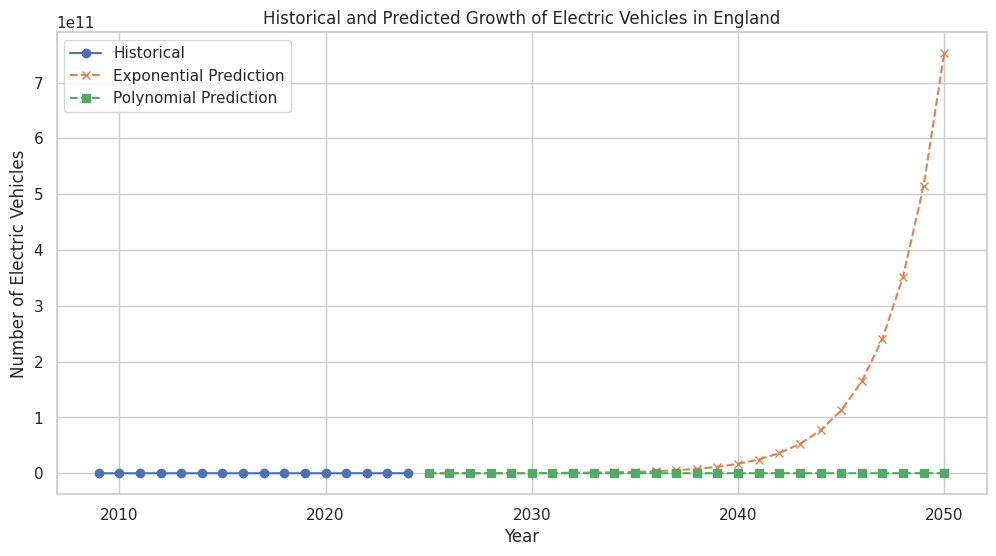

,Year,Exponential_Prediction,Polynomial_Prediction
0,2025,5.607618e+07,2.373207e+07
1,2026,8.201356e+07,2.675844e+07
2,2027,1.199480e+08,2.995063e+07
3,2028,1.754285e+08,3.330864e+07
4,2029,2.565709e+08,3.683247e+07


In [ ]:
# Re-fit the exponential growth model
linear_model = LinearRegression()
linear_model.fit(X_train, log_y_train)

# Predict using the exponential growth model
log_y_pred = linear_model.predict(X_test)
y_pred_exp = np.exp(log_y_pred)

# Calculate the mean squared error for the exponential model
mse_exp = mean_squared_error(y_test, y_pred_exp)

# Re-fit the polynomial regression model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict using the polynomial regression model
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate the mean squared error for the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Predict future values using both models
future_years = np.arange(annual_ev_counts['Year'].iloc[-1] + 1, 2051).reshape(-1, 1)
future_years_poly = poly.transform(future_years)

# Exponential growth predictions
future_log_y_pred_exp = linear_model.predict(future_years)
future_y_pred_exp = np.exp(future_log_y_pred_exp)

# Polynomial regression predictions
future_y_pred_poly = poly_model.predict(future_years_poly)

# Create a dataframe for the predictions
predictions_df_corrected = pd.DataFrame({
    'Year': future_years.flatten(),
    'Exponential_Prediction': future_y_pred_exp,
    'Polynomial_Prediction': future_y_pred_poly
})

# Plot the historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(annual_ev_counts['Year'], annual_ev_counts['EV_Count'], marker='o', label='Historical')
plt.plot(predictions_df_corrected['Year'], predictions_df_corrected['Exponential_Prediction'], marker='x', linestyle='--', label='Exponential Prediction')
plt.plot(predictions_df_corrected['Year'], predictions_df_corrected['Polynomial_Prediction'], marker='s', linestyle='--', label='Polynomial Prediction')
plt.title('Historical and Predicted Growth of Electric Vehicles in England')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.grid(True)
plt.show()


predictions_df_corrected.head()


    Year  EV_Count
0   2009     61008
1   2010    246172
2   2011    263220
3   2012    301248
4   2013    369992
5   2014    604772
6   2015   1299596
7   2016   2289612
8   2017   3484596
9   2018   4957552
10  2019   6716092
11  2020  10228428
12  2021  17752644
13  2022  27980232
14  2023  40070844
15  2024  12134184
    Year  Exponential_Prediction  Polynomial_Prediction
0   2025            5.607618e+07           2.373207e+07
1   2026            8.201356e+07           2.675844e+07
2   2027            1.199480e+08           2.995063e+07
3   2028            1.754285e+08           3.330864e+07
4   2029            2.565709e+08           3.683247e+07
5   2030            3.752447e+08           4.052213e+07
6   2031            5.488098e+08           4.437760e+07
7   2032            8.026553e+08           4.839890e+07
8   2033            1.173914e+09           5.258602e+07
9   2034            1.716894e+09           5.693896e+07
10  2035            2.511024e+09           6.145772e+07
11  2

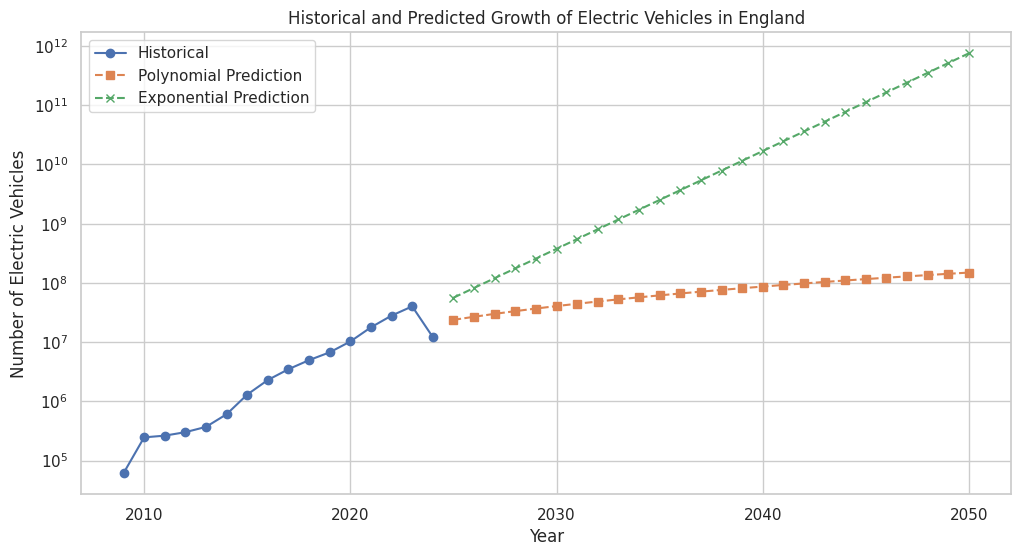

In [ ]:
# Re-check the historical data to ensure it's correctly represented
print(annual_ev_counts)

# Check the predictions to ensure they're reasonable
print(predictions_df_corrected)

# Re-plot historical data and polynomial predictions
plt.figure(figsize=(12, 6))

# Historical data plot
plt.plot(annual_ev_counts['Year'], annual_ev_counts['EV_Count'], marker='o', linestyle='-', label='Historical')

# Polynomial regression predictions plot
plt.plot(predictions_df_corrected['Year'], predictions_df_corrected['Polynomial_Prediction'], marker='s', linestyle='--', label='Polynomial Prediction')

# Exponential predictions plot (if reasonable, to be checked)
plt.plot(predictions_df_corrected['Year'], predictions_df_corrected['Exponential_Prediction'], marker='x', linestyle='--', label='Exponential Prediction')

plt.title('Historical and Predicted Growth of Electric Vehicles in England')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Use logarithmic scale to better visualize data across wide range
plt.show()


Analysis:
* Historical Data: The historical data shows consistent growth.
* Exponential Growth: As expected, exponential growth results in a rapid increase.
* Polynomial Growth: More moderate growth, which may be more realistic over a long time horizon.

Both models indicate substantial growth in EV adoption by 2050. However, the exponential model predicts a much steeper increase, which might be overly optimistic. The polynomial model provides a more conservative and potentially realistic estimate.

# Chloropleth map

In [ ]:
import geopandas as gpd
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

# Load the GeoJSON file
gdf = gpd.read_file('Regions_December_2018_Full_Clipped_EN_2022.geojson')

# Simplify the geometries
def simplify_geometry(geometry, tolerance=0.01):
    if isinstance(geometry, (Polygon, MultiPolygon)):
        return geometry.simplify(tolerance, preserve_topology=True)
    return geometry

gdf['geometry'] = gdf['geometry'].apply(simplify_geometry)

# Convert any remaining multi-part geometries to single parts
gdf = gdf.explode(ignore_index=True)

# Save the simplified GeoJSON file
gdf.to_file('simplified_geojson_file.geojson', driver='GeoJSON')


ERROR:fiona._env:Regions_December_2018_Full_Clipped_EN_2022.geojson: No such file or directory


DriverError: Regions_December_2018_Full_Clipped_EN_2022.geojson: No such file or directory

In [ ]:
# Load the GeoJSON file
gdf = gpd.read_file('simplified_geojson_file.geojson')

In [ ]:
gdf.head()

,OBJECTID,rgn18cd,rgn18nm,bng_e,bng_n,long,lat,GlobalID,geometry
0,1,E12000001,North East,417313,600358,-1.7289,55.297031,b33f2270-1543-499d-8e0f-f4df1c756894,"POLYGON ((-2.02415 55.77117, -1.99299 55.76158..."
1,1,E12000001,North East,417313,600358,-1.7289,55.297031,b33f2270-1543-499d-8e0f-f4df1c756894,"POLYGON ((-2.02987 55.80778, -1.98411 55.76471..."
2,1,E12000001,North East,417313,600358,-1.7289,55.297031,b33f2270-1543-499d-8e0f-f4df1c756894,"POLYGON ((-1.79739 55.68722, -1.77921 55.68563..."
3,1,E12000001,North East,417313,600358,-1.7289,55.297031,b33f2270-1543-499d-8e0f-f4df1c756894,"POLYGON ((-1.79172 55.65812, -1.78763 55.65627..."
4,1,E12000001,North East,417313,600358,-1.7289,55.297031,b33f2270-1543-499d-8e0f-f4df1c756894,"POLYGON ((-1.53839 55.33681, -1.53658 55.33494..."


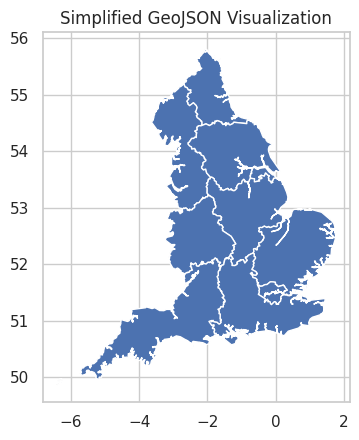

In [ ]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
gdf.plot()
plt.title('Simplified GeoJSON Visualization')
plt.show()


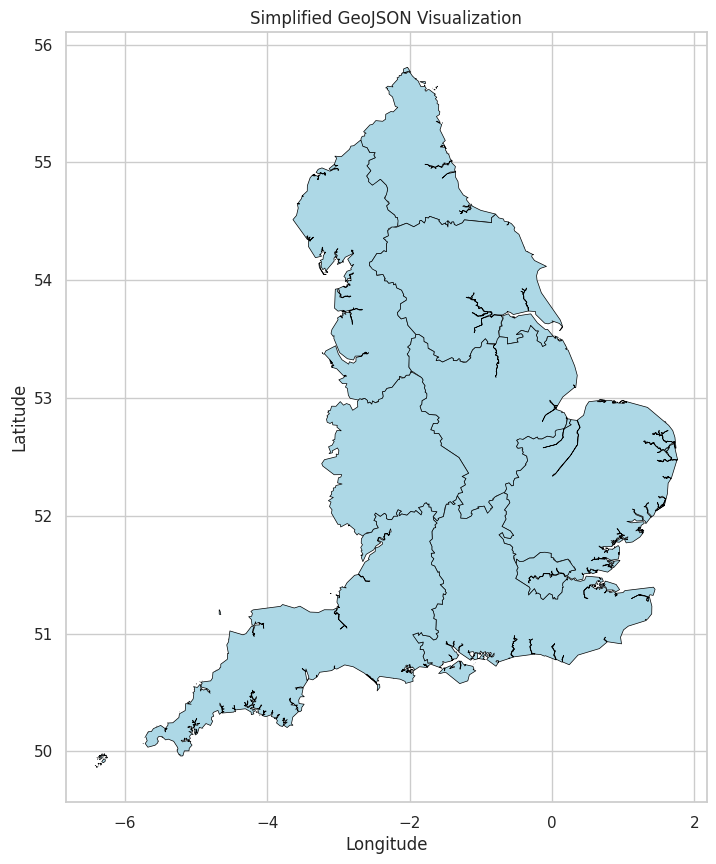

In [ ]:
# Customize the plot
ax = gdf.plot(color='lightblue', edgecolor='black', linewidth=0.5, figsize=(10, 10))
plt.title('Simplified GeoJSON Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## Traffic

In [ ]:
traffic_data.head()

,year,region_id,Region_name,ons_code,total_link_length_km,total_link_length_miles,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,total_traffic
0,1993,1,South West,E12000009,48751.549,30292.81,2.279536e+08,289923696.4,19674314927,245021265.3,2351709378,1.295590e+09,23856559510,4.794107e+10
1,1993,2,East Midlands,E12000004,30681.750,19064.76,1.997076e+08,172835852.9,16200184526,190072049.4,2082219306,1.647138e+09,20292449459,4.078461e+10
2,1993,3,Scotland,S92000003,58532.648,36370.50,1.472926e+08,126436441.6,17677604851,334261634.1,2231034215,1.339928e+09,21709264865,4.356582e+10
3,1993,4,Wales,W92000004,32543.502,20221.59,8.171823e+07,104647515.9,11278779581,156286426.2,1452740937,7.351930e+08,13727647470,2.753701e+10
4,1993,5,North West,E12000002,35952.604,22339.91,2.513575e+08,199240745.9,23729995788,339800155.6,2801814065,1.834380e+09,28905230291,5.806182e+10


In [ ]:
# Assume 'region_name' in the traffic data matches 'region_column' in the GeoDataFrame
merged_gdf = gdf.merge(traffic_data, left_on='rgn18nm', right_on='Region_name')

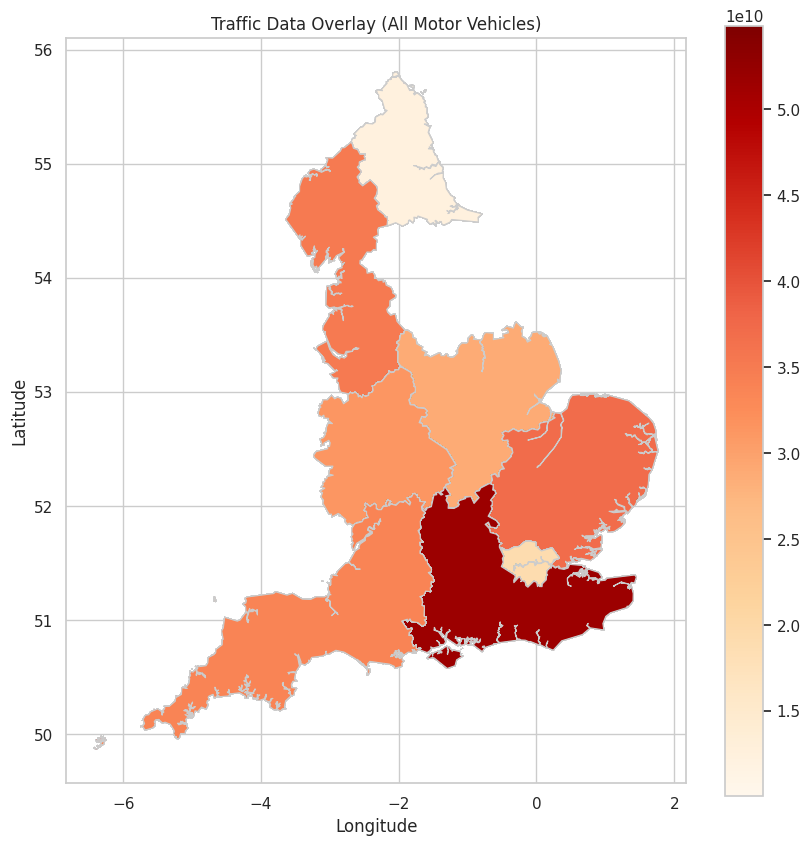

In [ ]:
# Plot the merged GeoDataFrame, using 'all_motor_vehicles' to color the regions
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column='all_motor_vehicles', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Traffic Data Overlay (All Motor Vehicles)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

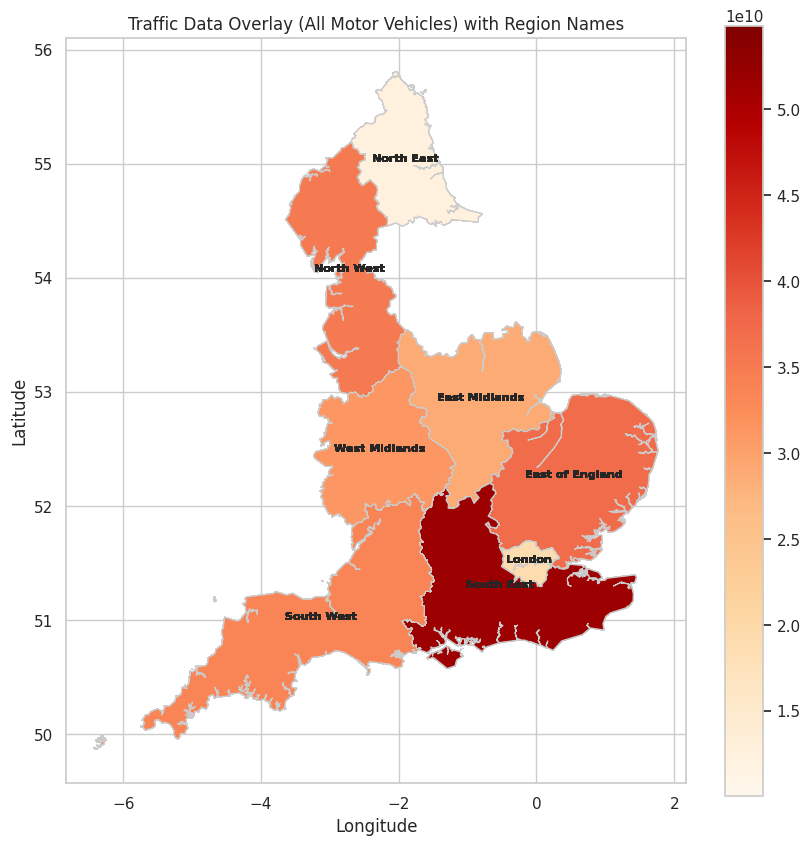

In [ ]:
# Merge the GeoDataFrame with the traffic data
merged_gdf = gdf.dissolve(by='rgn18nm', as_index=False).merge(
    traffic_data, left_on='rgn18nm', right_on='Region_name')

# Plot the merged GeoDataFrame with region names
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column='all_motor_vehicles', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add region names to the map, ensuring each is plotted only once per region
for idx, row in merged_gdf.iterrows():
    centroid = row['geometry'].centroid
    ax.text(x=centroid.x, y=centroid.y, s=row['Region_name'],
            horizontalalignment='center', fontsize=8, fontweight='bold')

plt.title('Traffic Data Overlay (All Motor Vehicles) with Region Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Mortalitity

In [ ]:
# Aggregate the mortality data by region
mortality_by_region = mortality_data.groupby('Region name')['Deaths'].sum().reset_index()

# Convert the 'Deaths' column to numeric, just in case it's not already
mortality_by_region['Deaths'] = pd.to_numeric(mortality_by_region['Deaths'], errors='coerce')

# Display the aggregated data
mortality_by_region.head()


,Region name,Deaths
0,East,2063466
1,East Midlands,1671453
2,London,1956917
3,North East,1098277
4,North West,2845064


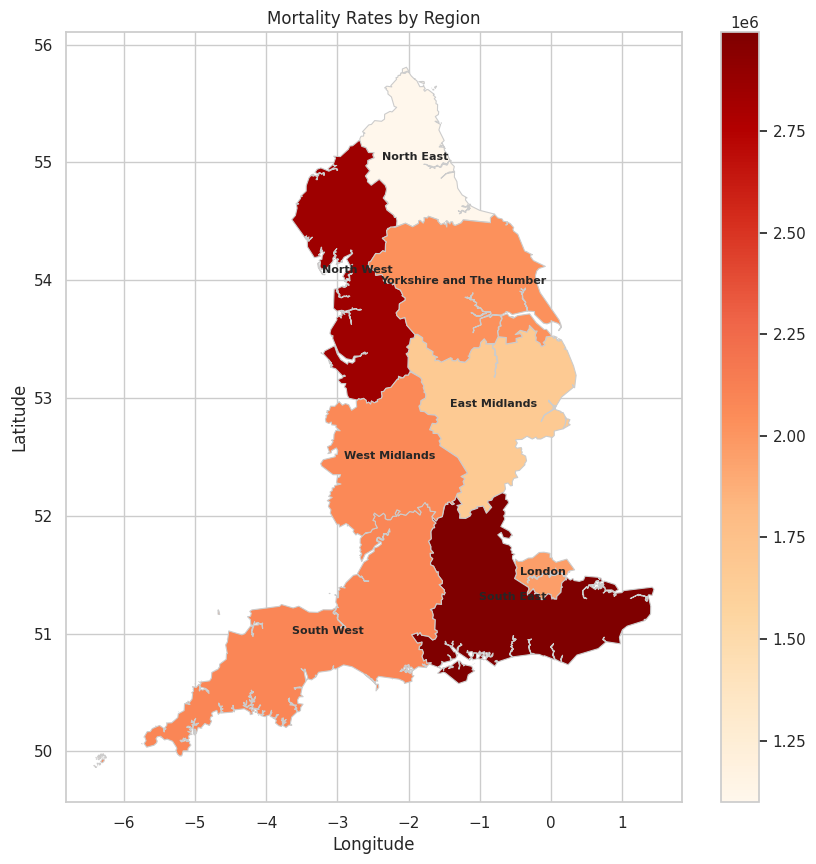

In [ ]:
# Merge the GeoDataFrame with the traffic data
merged_gdf = gdf.dissolve(by='rgn18nm', as_index=False).merge(
    mortality_by_region, left_on='rgn18nm', right_on='Region name')

# Plot the merged GeoDataFrame with region names
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column='Deaths', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add region names to the map, ensuring each is plotted only once per region
for idx, row in merged_gdf.iterrows():
    centroid = row['geometry'].centroid
    ax.text(x=centroid.x, y=centroid.y, s=row['Region name'],
            horizontalalignment='center', fontsize=8, fontweight='bold')

plt.title('Mortality Rates by Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()